# Suicide analysis by Gender Only




## Import data and preprocessing

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import scipy.cluster.hierarchy as hac
from datetime import datetime
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#For Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#For Google Colab
path = "/content/drive/My Drive/Colab Notebooks/"
file1 = "57_countries.csv"
df = pd.read_csv(path+file1)

df.head()


country  year   sex  ... 35-54 years  55-74 years  75+ years
0  Argentina  1985  male  ...           0            0        202
1  Argentina  1985  male  ...           0          485          0
2  Argentina  1985  male  ...         414            0          0
3  Argentina  1985  male  ...           0            0          0
4  Argentina  1985  male  ...           0            0          0

[5 rows x 34 columns]

In [ ]:
#DIVISION BY GENDER
male_df = df[df["sex"] == "male"]
male_df = male_df.reset_index(drop=True)
female_df = df[df["sex"] == "female"]
female_df = female_df.reset_index(drop=True)

In [ ]:
female_df

country  year     sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  female  ...           0          210          0
1     Argentina  1985  female  ...           0            0         41
2     Argentina  1985  female  ...         142            0          0
3     Argentina  1985  female  ...           0            0          0
4     Argentina  1985  female  ...           0            0          0
...         ...   ...     ...  ...         ...          ...        ...
9908    Uruguay  2015  female  ...           0           34          0
9909    Uruguay  2015  female  ...           0            0          0
9910    Uruguay  2015  female  ...          38            0          0
9911    Uruguay  2015  female  ...           0            0          0
9912    Uruguay  2015  female  ...           0            0          0

[9913 rows x 34 columns]

In [ ]:
print(len(male_df))
print(len(female_df))

9913
9913


In [ ]:
male_df.isnull().sum()
female_df.isnull().sum()

country                         0
year                            0
sex                             0
age                             0
suicides_no                     0
population                      0
suicides/100k pop               0
country-year                    0
 gdp_for_year ($)               0
gdp_per_capita ($)              0
generation                      0
Country-Age-sex                 0
Total_suicides                  0
Total_population                0
Max_Suicide                     0
Max_Population                  0
Min_suicides                    0
min_population                  0
Mean_suicides                   0
Mean_population                 0
GDP_percentage_growth           0
Population_percentage_growth    0
SPPI                            0
countrylabel                    0
sexlabel                        0
agelabel                        0
genlabels                       0
Country-Age-sex-range           0
5-14 years                      0
15-24 years   

This resetting is only to make sure there is nothing wierd going on.

In [ ]:
male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df

country  year   sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  male  ...           0            0        202
1     Argentina  1985  male  ...           0          485          0
2     Argentina  1985  male  ...         414            0          0
3     Argentina  1985  male  ...           0            0          0
4     Argentina  1985  male  ...           0            0          0
...         ...   ...   ...  ...         ...          ...        ...
9908    Uruguay  2015  male  ...           0          133          0
9909    Uruguay  2015  male  ...           0            0          0
9910    Uruguay  2015  male  ...         135            0          0
9911    Uruguay  2015  male  ...           0            0          0
9912    Uruguay  2015  male  ...           0            0          0

[9913 rows x 34 columns]

Now, we set the indexes as the year for the dataframes.

In [ ]:
male_df.set_index('year', inplace = True)
male_df.sort_values(by = ['year', 'country'], inplace = True)
male_df.sort_index(inplace = True)
female_df.set_index('year', inplace = True)
female_df.sort_values(by = ['year', 'country'], inplace = True)
female_df.sort_index(inplace = True)

In [ ]:
# male_df
female_df

country     sex          age  ...  35-54 years  55-74 years  75+ years
year                                  ...                                     
1985  Argentina  female  55-74 years  ...            0          210          0
1985  Argentina  female    75+ years  ...            0            0         41
1985  Argentina  female  35-54 years  ...          142            0          0
1985  Argentina  female  25-34 years  ...            0            0          0
1985  Argentina  female  15-24 years  ...            0            0          0
...         ...     ...          ...  ...          ...          ...        ...
2016   Thailand  female    75+ years  ...            0            0         69
2016   Thailand  female  55-74 years  ...            0          222          0
2016   Thailand  female  35-54 years  ...          375            0          0
2016   Thailand  female  25-34 years  ...            0            0          0
2016   Thailand  female  15-24 years  ...            0            0          0

[9913 rows x 33 columns]

In [ ]:
## Total No of Suicides
targets = male_df.columns[11:12]
# Suicides No
# targets = df75.columns[3:4]

country = male_df["country"].unique()
## Total No of Suicides
fetargets = female_df.columns[11:12]
# Suicides No
# targets = df75.columns[3:4]

fecountry = female_df["country"].unique()


### 1 A. Extract time series for each country



Men Argentina 's Total_suicides


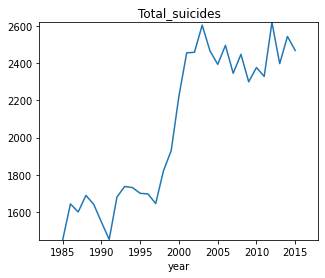

Men Australia 's Total_suicides


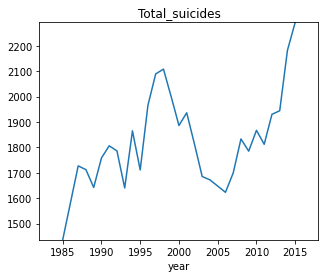

Men Austria 's Total_suicides


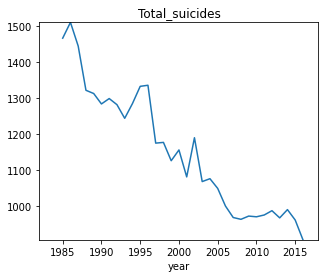

Men Barbados 's Total_suicides


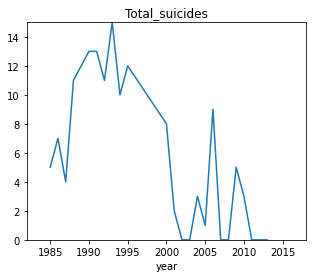

Men Belgium 's Total_suicides


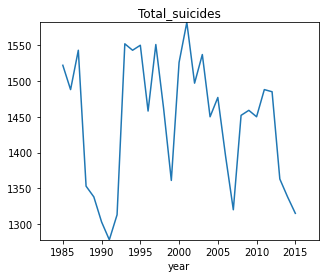

Men Brazil 's Total_suicides


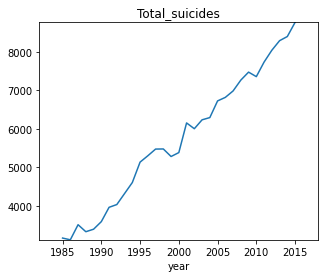

Men Bulgaria 's Total_suicides


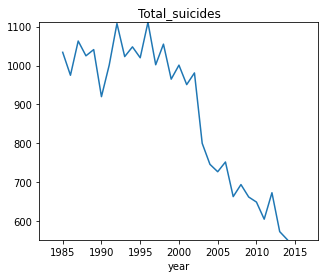

Men Canada 's Total_suicides


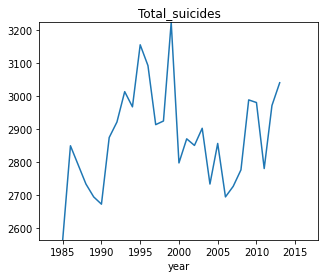

Men Chile 's Total_suicides


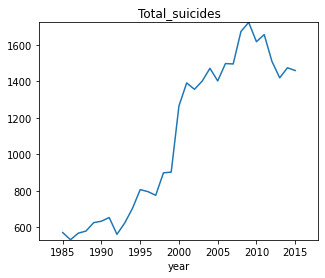

Men Colombia 's Total_suicides


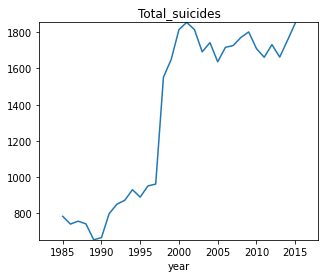

Men Costa Rica 's Total_suicides


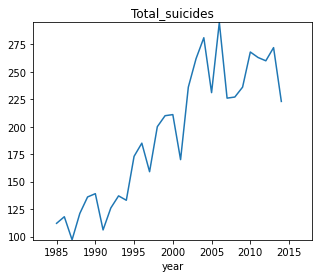

Men Ecuador 's Total_suicides


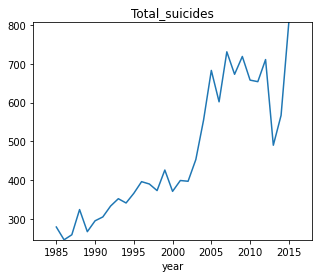

Men France 's Total_suicides


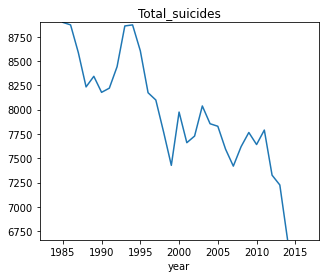

Men Greece 's Total_suicides


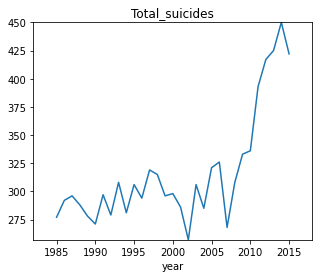

Men Grenada 's Total_suicides


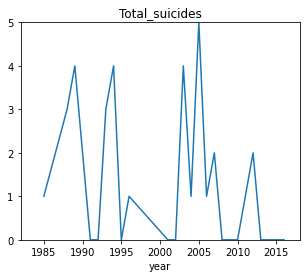

Men Iceland 's Total_suicides


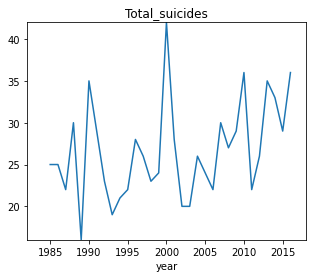

Men Ireland 's Total_suicides


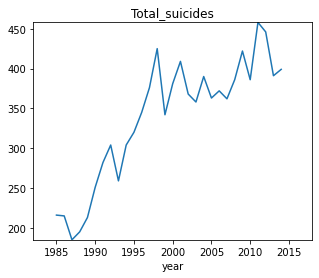

Men Israel 's Total_suicides


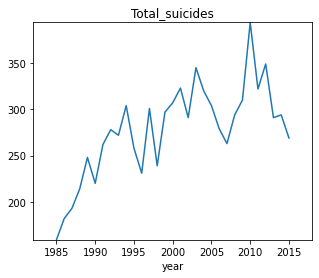

Men Italy 's Total_suicides


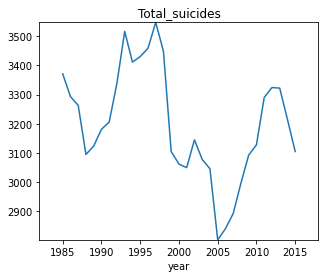

Men Japan 's Total_suicides


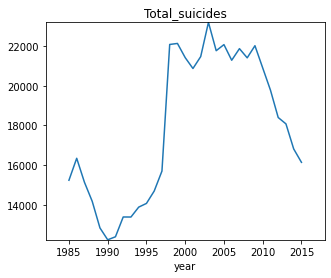

Men Kuwait 's Total_suicides


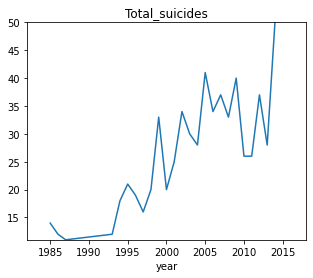

Men Luxembourg 's Total_suicides


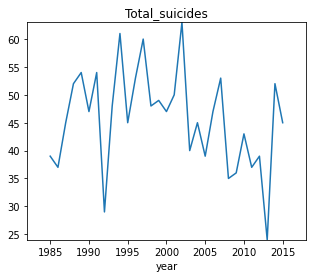

Men Malta 's Total_suicides


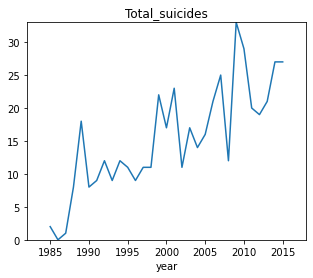

Men Mauritius 's Total_suicides


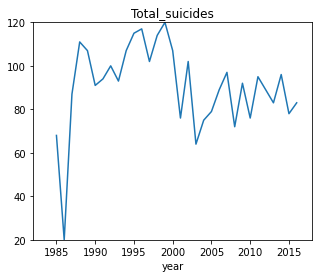

Men Mexico 's Total_suicides


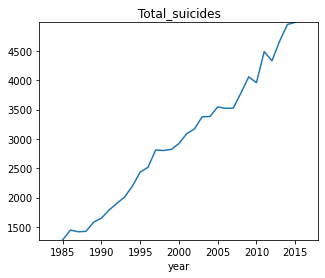

Men Netherlands 's Total_suicides


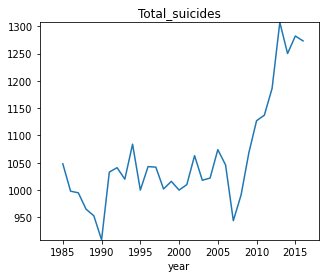

Men New Zealand 's Total_suicides


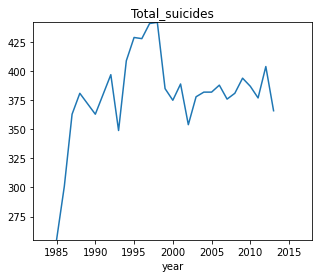

Men Panama 's Total_suicides


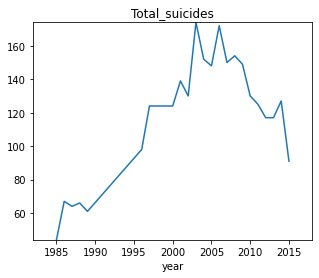

Men Paraguay 's Total_suicides


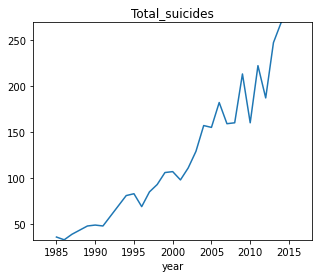

Men Portugal 's Total_suicides


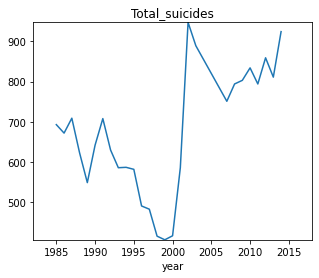

Men Puerto Rico 's Total_suicides


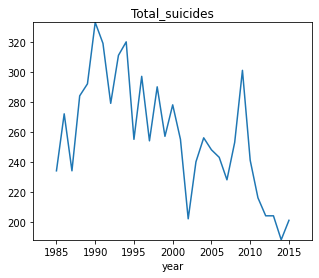

Men Republic of Korea 's Total_suicides


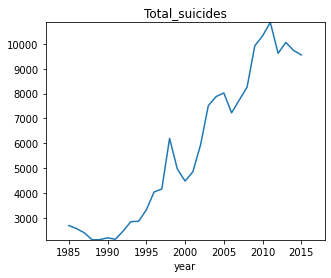

Men Saint Vincent and Grenadines 's Total_suicides


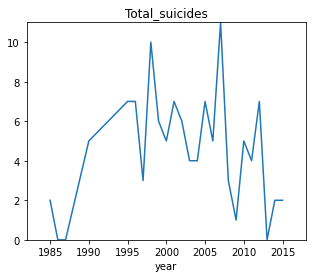

Men Singapore 's Total_suicides


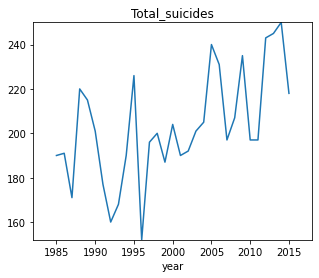

Men Spain 's Total_suicides


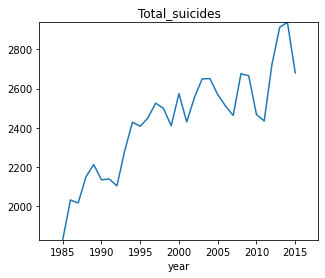

Men Suriname 's Total_suicides


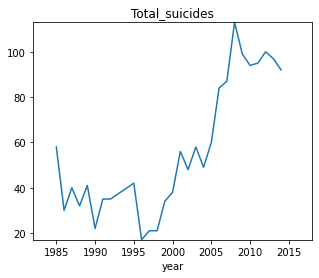

Men Thailand 's Total_suicides


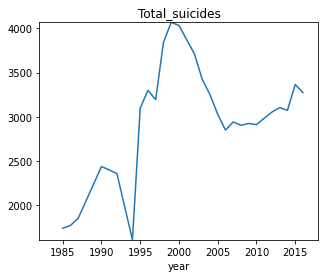

Men Trinidad and Tobago 's Total_suicides


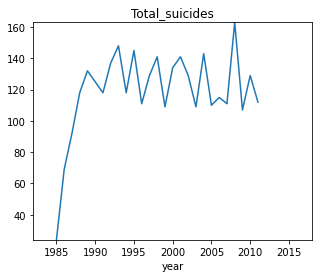

Men United Kingdom 's Total_suicides


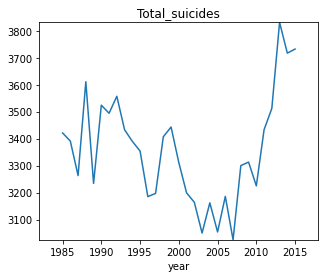

Men United States 's Total_suicides


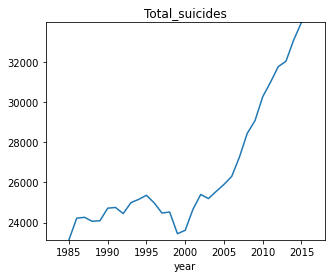

Men Uruguay 's Total_suicides


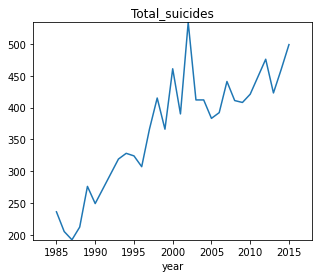

Men Belize 's Total_suicides


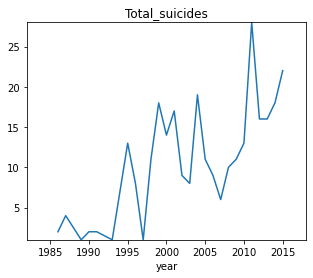

Men Guatemala 's Total_suicides


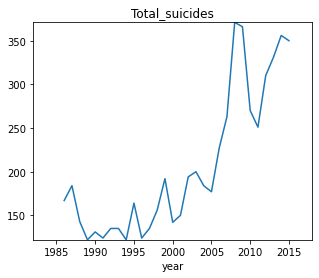

Men Norway 's Total_suicides


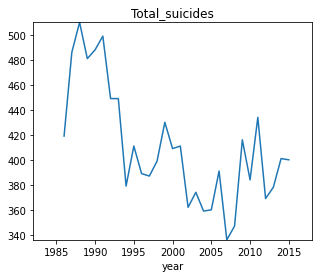

Men Saint Lucia 's Total_suicides


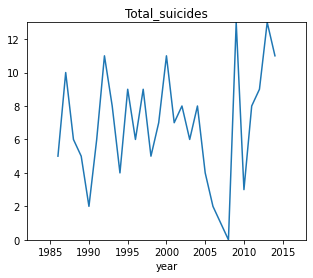

Men Finland 's Total_suicides


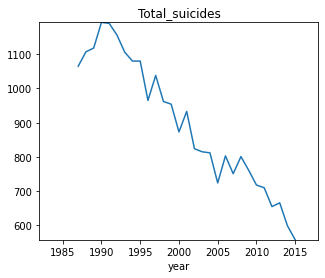

Men Sweden 's Total_suicides


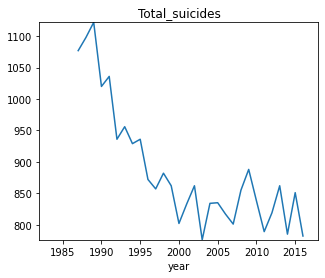

Men Guyana 's Total_suicides


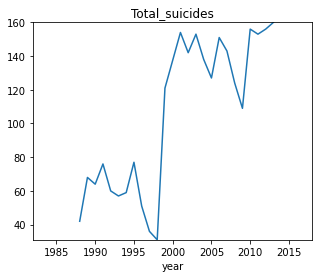

Men Ukraine 's Total_suicides


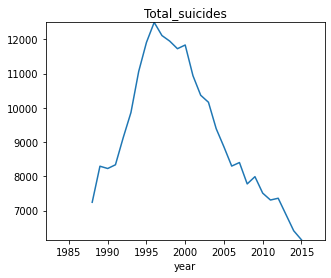

Men Romania 's Total_suicides


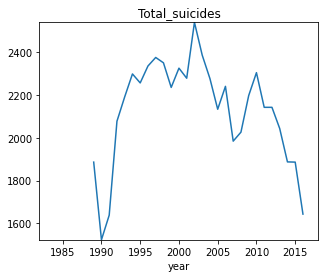

Men Russian Federation 's Total_suicides


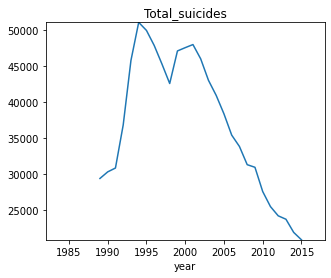

Men Armenia 's Total_suicides


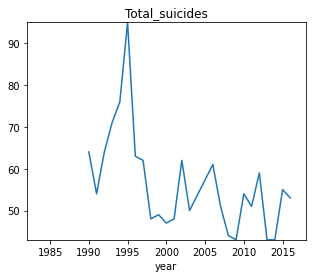

Men Czech Republic 's Total_suicides


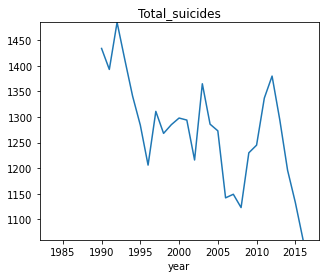

Men Germany 's Total_suicides


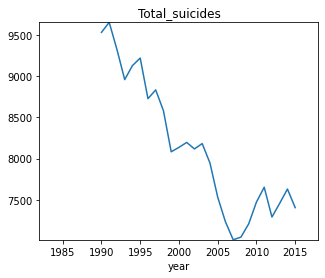

Men Kazakhstan 's Total_suicides


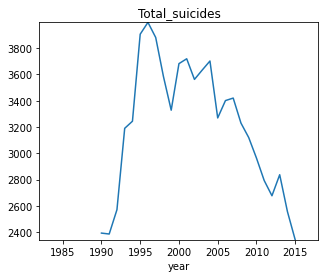

Men Kyrgyzstan 's Total_suicides


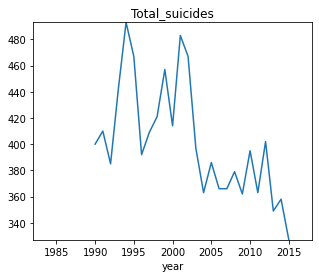

Men Hungary 's Total_suicides


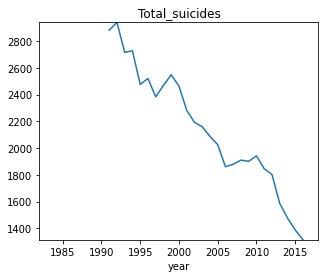

In [ ]:
# For male
for s in country:
    
    for t in targets:
      print("Men", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = male_df[male_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(male_df[male_df["country"] == s][t].min(),male_df[male_df["country"] == s][t].max())
      plt.show()


Women  Argentina 's Total_suicides


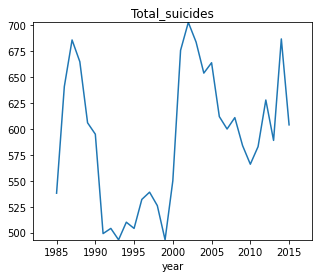

Women  Australia 's Total_suicides


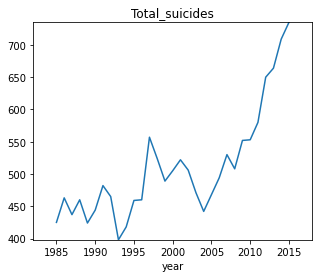

Women  Austria 's Total_suicides


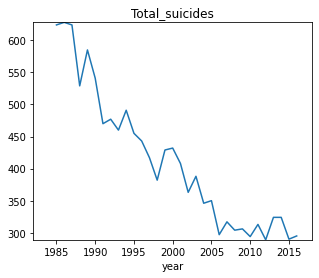

Women  Barbados 's Total_suicides


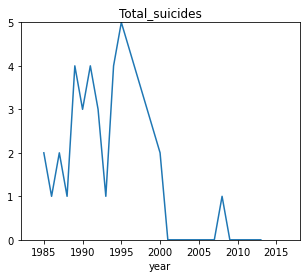

Women  Belgium 's Total_suicides


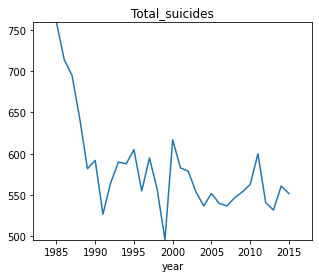

Women  Brazil 's Total_suicides


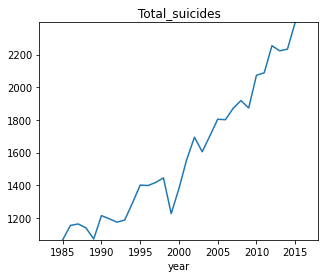

Women  Bulgaria 's Total_suicides


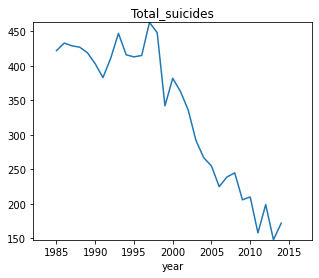

Women  Canada 's Total_suicides


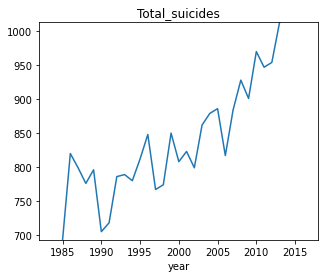

Women  Chile 's Total_suicides


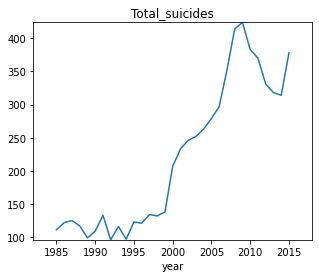

Women  Colombia 's Total_suicides


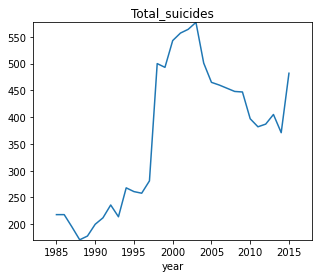

Women  Costa Rica 's Total_suicides


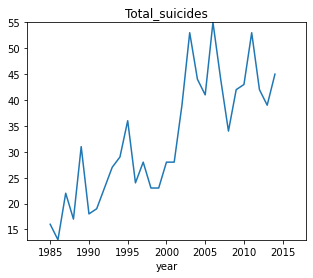

Women  Ecuador 's Total_suicides


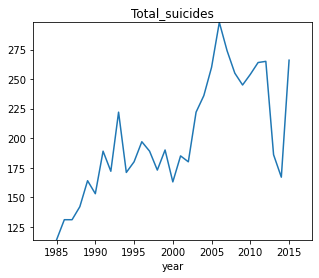

Women  France 's Total_suicides


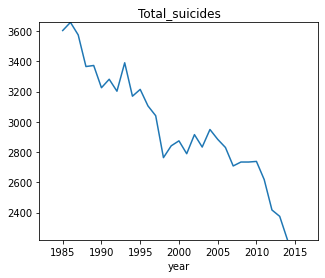

Women  Greece 's Total_suicides


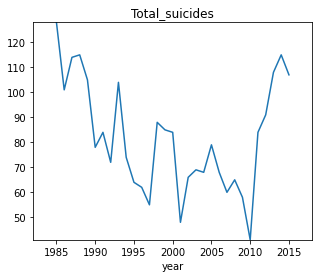

Women  Grenada 's Total_suicides


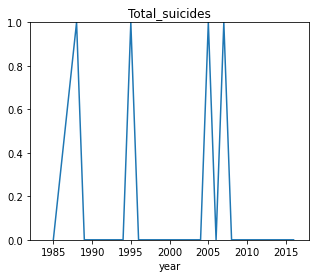

Women  Iceland 's Total_suicides


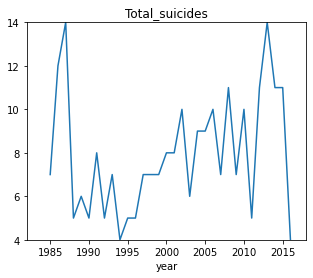

Women  Ireland 's Total_suicides


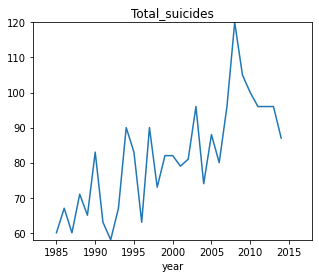

Women  Israel 's Total_suicides


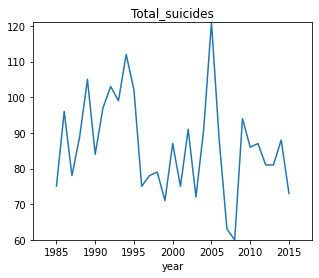

Women  Italy 's Total_suicides


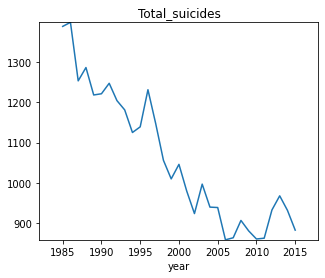

Women  Japan 's Total_suicides


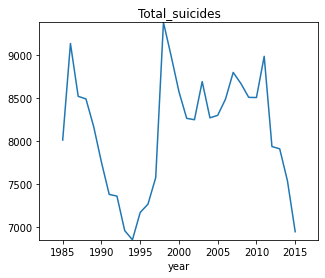

Women  Kuwait 's Total_suicides


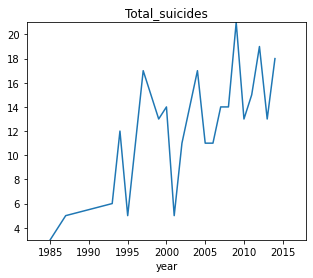

Women  Luxembourg 's Total_suicides


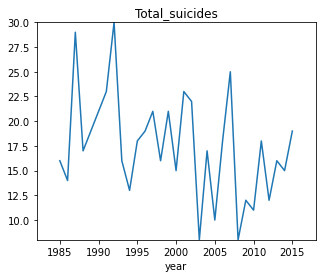

Women  Malta 's Total_suicides


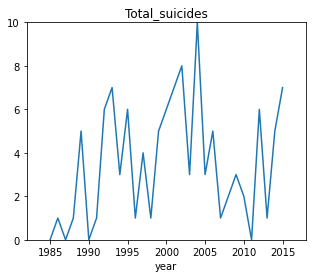

Women  Mauritius 's Total_suicides


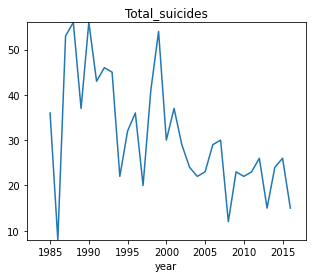

Women  Mexico 's Total_suicides


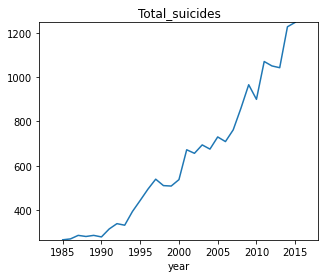

Women  Netherlands 's Total_suicides


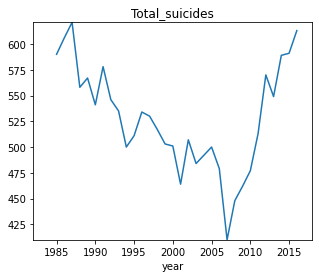

Women  New Zealand 's Total_suicides


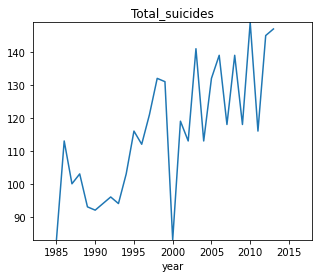

Women  Panama 's Total_suicides


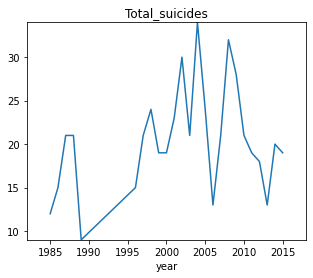

Women  Paraguay 's Total_suicides


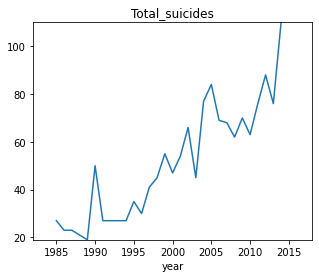

Women  Portugal 's Total_suicides


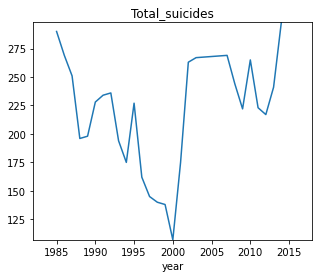

Women  Puerto Rico 's Total_suicides


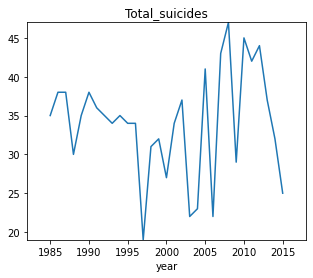

Women  Republic of Korea 's Total_suicides


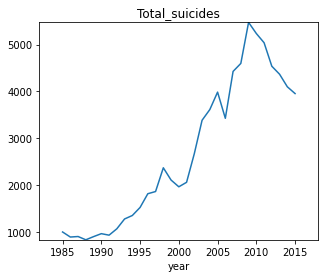

Women  Saint Vincent and Grenadines 's Total_suicides


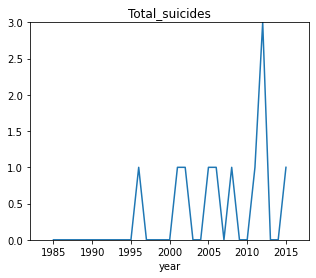

Women  Singapore 's Total_suicides


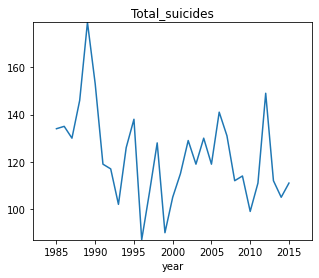

Women  Spain 's Total_suicides


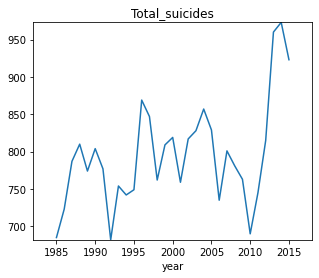

Women  Suriname 's Total_suicides


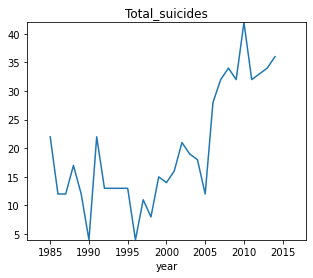

Women  Thailand 's Total_suicides


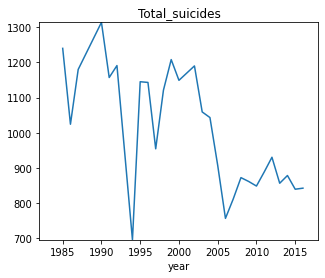

Women  Trinidad and Tobago 's Total_suicides


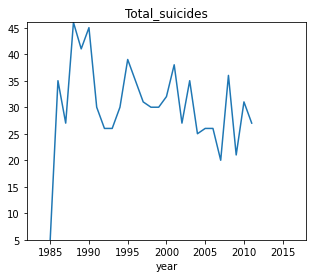

Women  United Kingdom 's Total_suicides


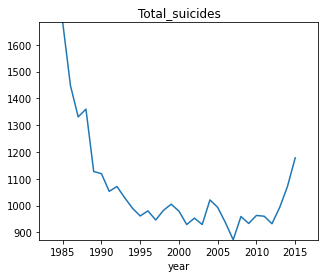

Women  United States 's Total_suicides


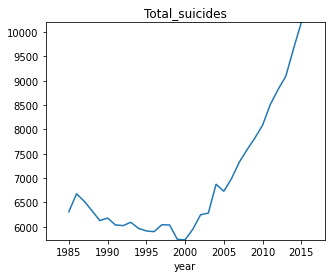

Women  Uruguay 's Total_suicides


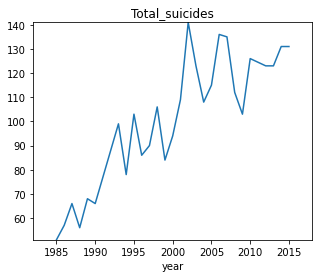

Women  Belize 's Total_suicides


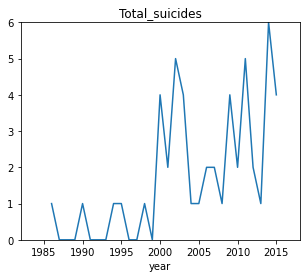

Women  Guatemala 's Total_suicides


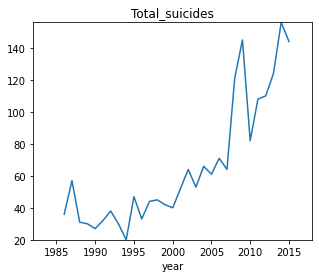

Women  Norway 's Total_suicides


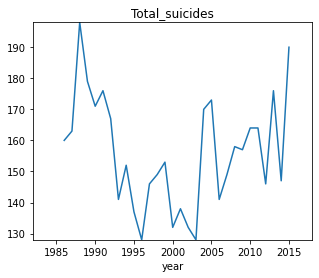

Women  Saint Lucia 's Total_suicides


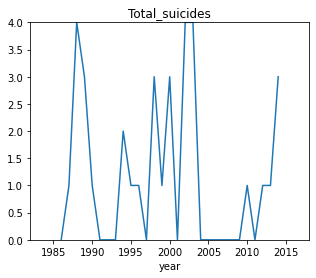

Women  Finland 's Total_suicides


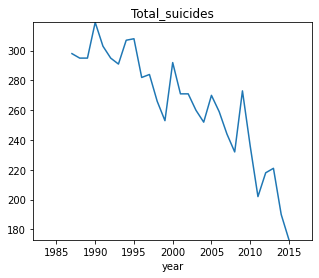

Women  Sweden 's Total_suicides


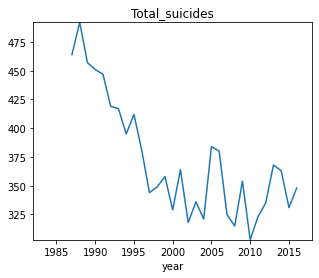

Women  Guyana 's Total_suicides


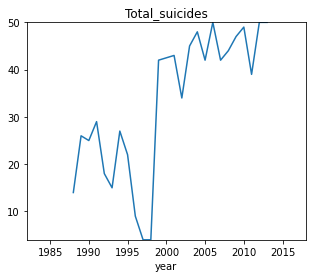

Women  Ukraine 's Total_suicides


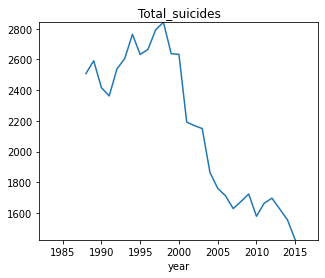

Women  Romania 's Total_suicides


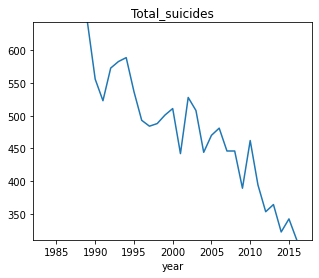

Women  Russian Federation 's Total_suicides


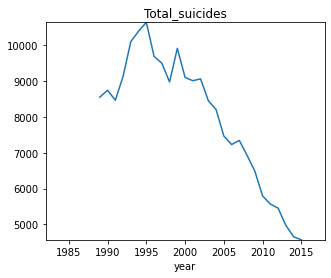

Women  Armenia 's Total_suicides


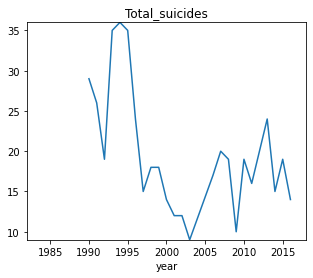

Women  Czech Republic 's Total_suicides


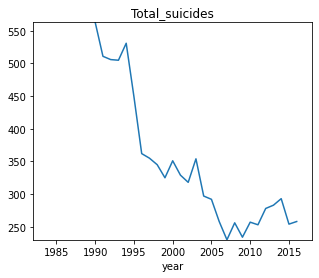

Women  Germany 's Total_suicides


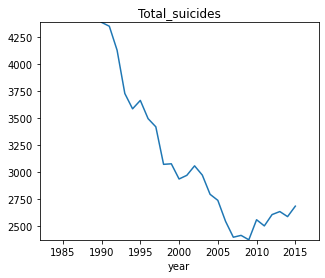

Women  Kazakhstan 's Total_suicides


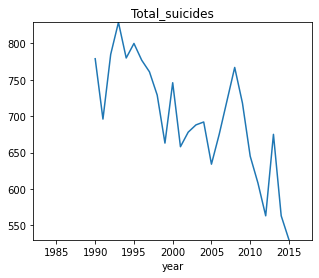

Women  Kyrgyzstan 's Total_suicides


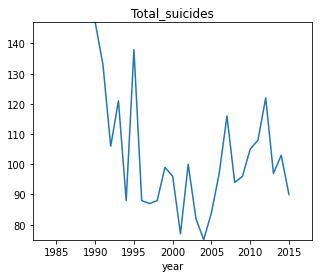

Women  Hungary 's Total_suicides


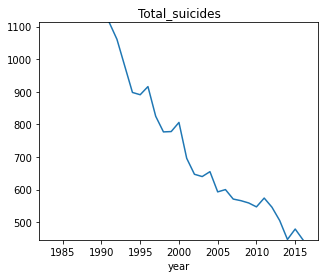

In [ ]:
# For female
for s in fecountry:
    for t in fetargets:
      print("Women ", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = female_df[female_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(female_df[female_df["country"] == s][t].min(),female_df[female_df["country"] == s][t].max())
      plt.show()


### 1 B. Plot the suicide time series for all countries.

In [ ]:
pivot_test = male_df.pivot_table(index = "year",columns="country", values=targets)
pivot_test_fem = female_df.pivot_table(index = "year", columns = "country", values = targets)


Total_suicides                    ...                                     
country      Argentina Armenia Australia  ... United Kingdom United States Uruguay
year                                      ...                                     
1985             538.0     NaN     425.0  ...         1684.0        6308.0    51.0
1986             641.0     NaN     463.0  ...         1448.0        6677.0    57.0
1987             686.0     NaN     437.0  ...         1331.0        6522.0    66.0
1988             665.0     NaN     460.0  ...         1360.0        6327.0    56.0
1989             606.0     NaN     424.0  ...         1127.0        6128.0    68.0
1990             595.0    29.0     444.0  ...         1119.0        6179.0    66.0
1991             499.0    26.0     482.0  ...         1053.0        6038.0     NaN
1992             504.0    19.0     465.0  ...         1071.0        6023.0     NaN
1993             493.0    35.0     398.0  ...         1029.0        6092.0    99.0
1994             510.0    36.0     418.0  ...          990.0        5966.0    78.0
1995             504.0    35.0     459.0  ...          961.0        5914.0   103.0
1996             532.0    24.0     460.0  ...          980.0        5899.0    86.0
1997             539.0    15.0     557.0  ...          946.0        6041.0    90.0
1998             526.0    18.0     524.0  ...          982.0        6037.0   106.0
1999             493.0    18.0     489.0  ...         1005.0        5741.0    84.0
2000             550.0    14.0     505.0  ...          979.0        5732.0    94.0
2001             676.0    12.0     522.0  ...          929.0        5949.0   109.0
2002             703.0    12.0     506.0  ...          953.0        6246.0   141.0
2003             684.0     9.0     471.0  ...          929.0        6281.0   123.0
2004             654.0     NaN     442.0  ...         1021.0        6873.0   108.0
2005             664.0     NaN       NaN  ...          993.0        6729.0   115.0
2006             612.0    17.0     494.0  ...          936.0        6992.0   136.0
2007             600.0    20.0     530.0  ...          872.0        7329.0   135.0
2008             611.0    19.0     508.0  ...          959.0        7583.0   112.0
2009             584.0    10.0     552.0  ...          933.0        7821.0   103.0
2010             566.0    19.0     553.0  ...          963.0        8087.0   126.0
2011             583.0    16.0     580.0  ...          960.0        8512.0     NaN
2012             628.0    20.0     650.0  ...          932.0        8819.0   123.0
2013             589.0    24.0     664.0  ...          993.0        9094.0   123.0
2014             687.0    15.0     709.0  ...         1071.0        9659.0   131.0
2015             604.0    19.0     735.0  ...         1178.0       10199.0   131.0
2016               NaN    14.0       NaN  ...            NaN           NaN     NaN

[32 rows x 57 columns]

In [ ]:
## This is for data interpolation
timeSeriesRes = pivot_test["Total_suicides"]

inter_ts = timeSeriesRes.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts = inter_ts.interpolate(method = 'pad',axis =0)
#female
timeSeriesRes_fem = pivot_test_fem["Total_suicides"]

inter_ts_fem = timeSeriesRes_fem.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts_fem = inter_ts_fem.interpolate(method = 'pad',axis =0)

In [ ]:
inter_ts

country  Argentina    Armenia  ...  United States     Uruguay
year                           ...                           
1985        1450.0  64.000000  ...        23138.0  236.000000
1986        1643.0  64.000000  ...        24215.0  205.000000
1987        1600.0  64.000000  ...        24261.0  192.000000
1988        1689.0  64.000000  ...        24061.0  212.000000
1989        1641.0  64.000000  ...        24090.0  276.000000
1990        1545.0  64.000000  ...        24716.0  249.000000
1991        1452.0  54.000000  ...        24752.0  272.333333
1992        1680.0  64.000000  ...        24448.0  295.666667
1993        1737.0  71.000000  ...        24992.0  319.000000
1994        1731.0  76.000000  ...        25157.0  328.000000
1995        1700.0  95.000000  ...        25358.0  324.000000
1996        1697.0  63.000000  ...        24980.0  307.000000
1997        1645.0  62.000000  ...        24476.0  366.000000
1998        1821.0  48.000000  ...        24521.0  415.000000
1999        1930.0  49.000000  ...        23442.0  366.000000
2000        2224.0  47.000000  ...        23611.0  461.000000
2001        2456.0  48.000000  ...        24658.0  390.000000
2002        2459.0  62.000000  ...        25399.0  534.000000
2003        2605.0  50.000000  ...        25196.0  412.000000
2004        2467.0  53.666667  ...        25555.0  412.000000
2005        2394.0  57.333333  ...        25900.0  383.000000
2006        2496.0  61.000000  ...        26300.0  392.000000
2007        2346.0  51.000000  ...        27267.0  441.000000
2008        2448.0  44.000000  ...        28447.0  411.000000
2009        2300.0  43.000000  ...        29079.0  408.000000
2010        2377.0  54.000000  ...        30275.0  421.000000
2011        2329.0  51.000000  ...        30996.0  448.500000
2012        2620.0  59.000000  ...        31777.0  476.000000
2013        2398.0  43.000000  ...        32049.0  423.000000
2014        2544.0  43.000000  ...        33110.0  460.000000
2015        2469.0  55.000000  ...        33990.0  499.000000
2016        2469.0  53.000000  ...        33990.0  499.000000

[32 rows x 57 columns]

In [ ]:
inter_ts_fem

country  Argentina    Armenia  ...  United States  Uruguay
year                           ...                        
1985         538.0  29.000000  ...         6308.0     51.0
1986         641.0  29.000000  ...         6677.0     57.0
1987         686.0  29.000000  ...         6522.0     66.0
1988         665.0  29.000000  ...         6327.0     56.0
1989         606.0  29.000000  ...         6128.0     68.0
1990         595.0  29.000000  ...         6179.0     66.0
1991         499.0  26.000000  ...         6038.0     77.0
1992         504.0  19.000000  ...         6023.0     88.0
1993         493.0  35.000000  ...         6092.0     99.0
1994         510.0  36.000000  ...         5966.0     78.0
1995         504.0  35.000000  ...         5914.0    103.0
1996         532.0  24.000000  ...         5899.0     86.0
1997         539.0  15.000000  ...         6041.0     90.0
1998         526.0  18.000000  ...         6037.0    106.0
1999         493.0  18.000000  ...         5741.0     84.0
2000         550.0  14.000000  ...         5732.0     94.0
2001         676.0  12.000000  ...         5949.0    109.0
2002         703.0  12.000000  ...         6246.0    141.0
2003         684.0   9.000000  ...         6281.0    123.0
2004         654.0  11.666667  ...         6873.0    108.0
2005         664.0  14.333333  ...         6729.0    115.0
2006         612.0  17.000000  ...         6992.0    136.0
2007         600.0  20.000000  ...         7329.0    135.0
2008         611.0  19.000000  ...         7583.0    112.0
2009         584.0  10.000000  ...         7821.0    103.0
2010         566.0  19.000000  ...         8087.0    126.0
2011         583.0  16.000000  ...         8512.0    124.5
2012         628.0  20.000000  ...         8819.0    123.0
2013         589.0  24.000000  ...         9094.0    123.0
2014         687.0  15.000000  ...         9659.0    131.0
2015         604.0  19.000000  ...        10199.0    131.0
2016         604.0  14.000000  ...        10199.0    131.0

[32 rows x 57 columns]

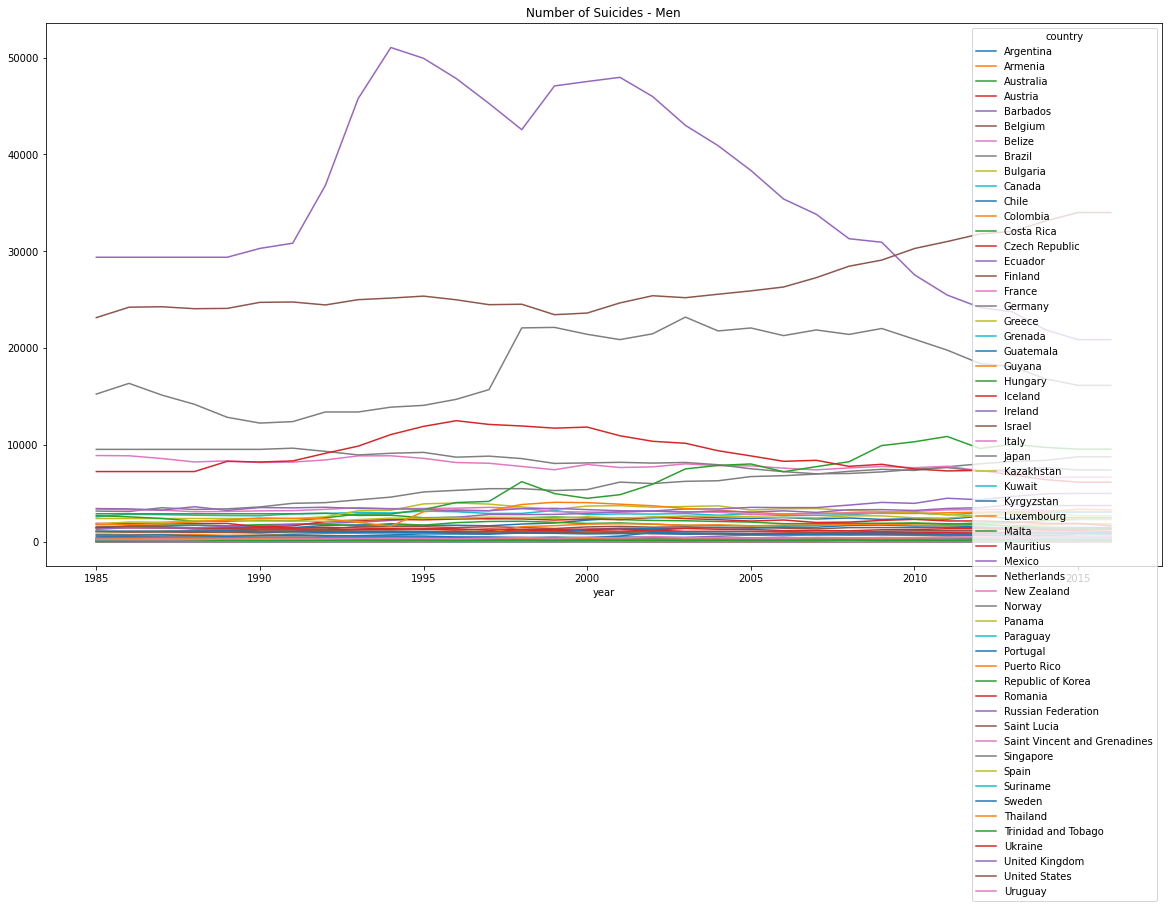

In [ ]:
inter_ts.plot(figsize = (20,10), title = "Number of Suicides - Men")

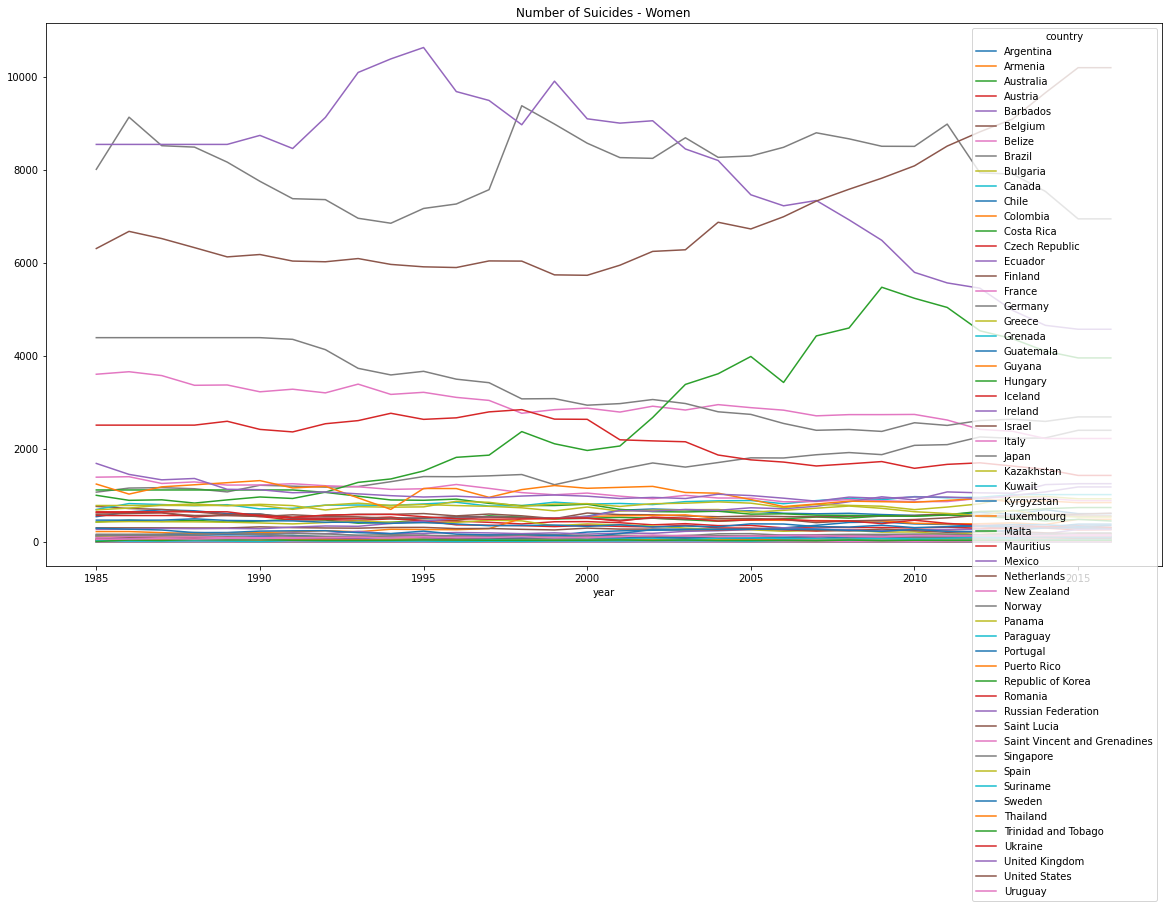

In [ ]:
inter_ts_fem.plot(figsize = (20,10), title = "Number of Suicides - Women")

## 2. Apply Hierarchical Clustering in order to identify those countries with similar behaviors in the time series.

### 2 A. method Ward with Euclidean distance


In [ ]:
Z = hac.linkage(inter_ts.T, method='ward', metric='euclidean')
Z_f = hac.linkage(inter_ts_fem.T, method='ward', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


[ 7 10  7  9 10  9 10  4  9  8  9  9 10  9 10  9  5  5 10 10 10 10  7 10
 10 10  8  1  8 10 10 10 10 10  8  9 10 10 10 10  9 10  4  7  3 10 10 10
  7 10  9  8 10  6  8  2 10]
Cluster 7 number of entries 5


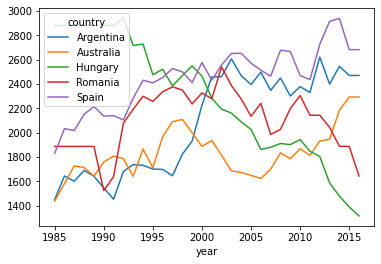

Cluster 10 number of entries 28


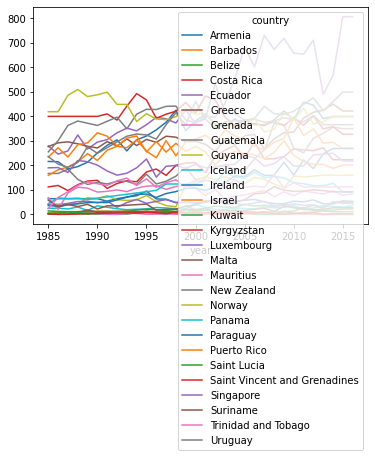

Cluster 9 number of entries 10


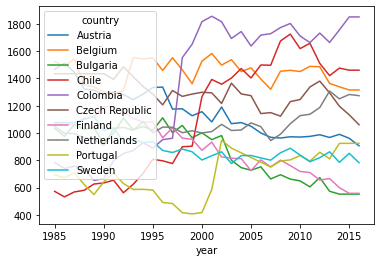

Cluster 4 number of entries 2


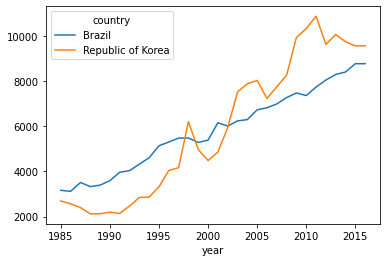

Cluster 8 number of entries 6


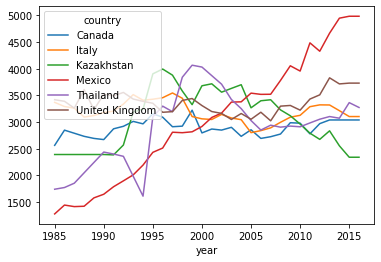

Cluster 5 number of entries 2


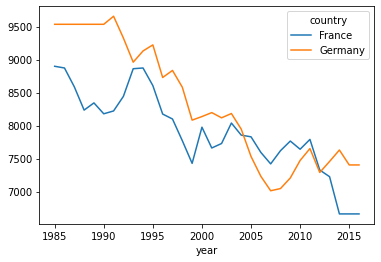

Cluster 1 number of entries 1


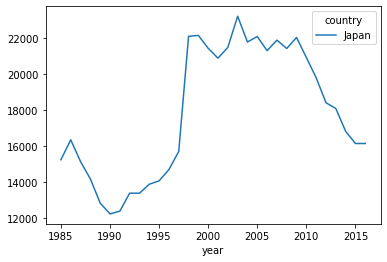

Cluster 3 number of entries 1


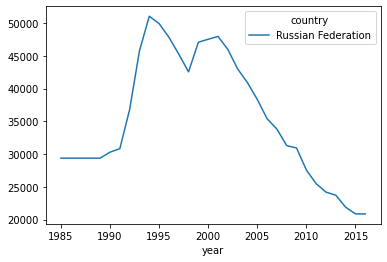

Cluster 6 number of entries 1


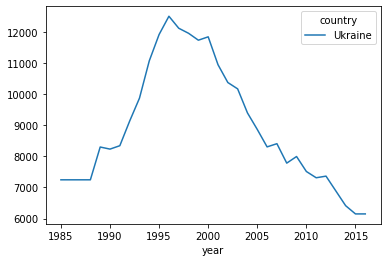

Cluster 2 number of entries 1


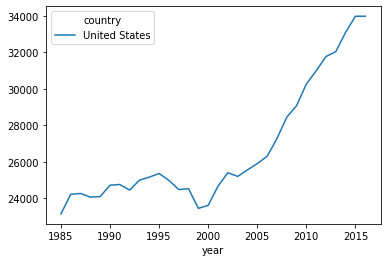

In [ ]:
print_clusters(inter_ts.T, Z, 10, True)

[ 8  9  8 10  9  8  9  5 10  8 10 10  9 10 10 10  4  4  9  9  9  9  8  9
  9  9  8  1  8  9  9  9  9  9  8  8  9  9  9  9 10  9  7 10  2  9  9  9
  8  9 10  8  9  6  8  3  9]
Cluster 8 number of entries 12


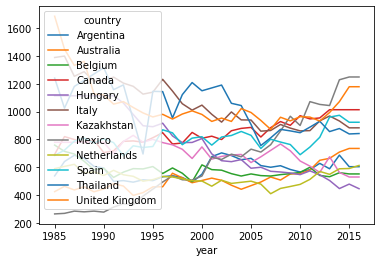

Cluster 9 number of entries 27


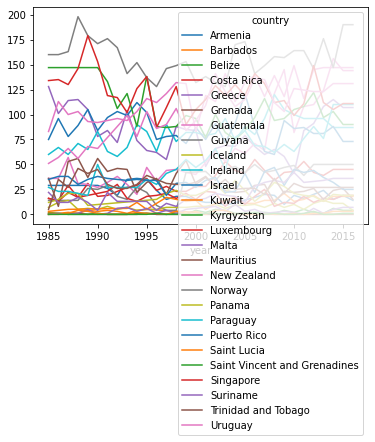

Cluster 10 number of entries 10


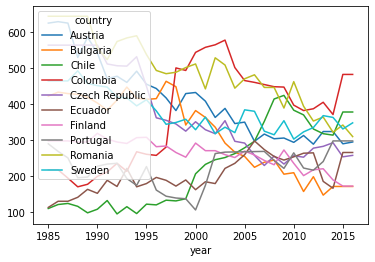

Cluster 5 number of entries 1


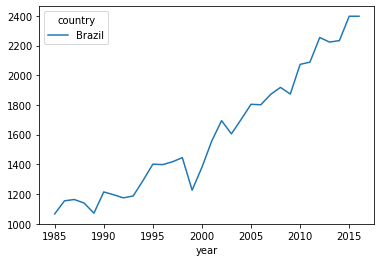

Cluster 4 number of entries 2


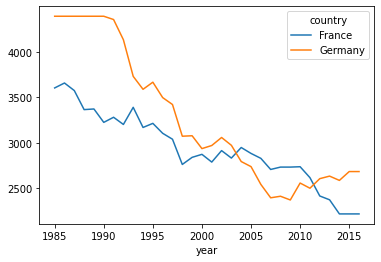

Cluster 1 number of entries 1


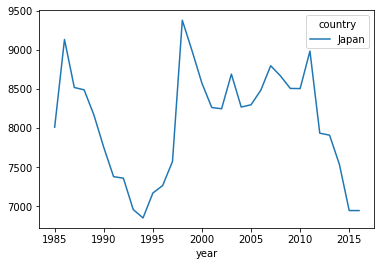

Cluster 7 number of entries 1


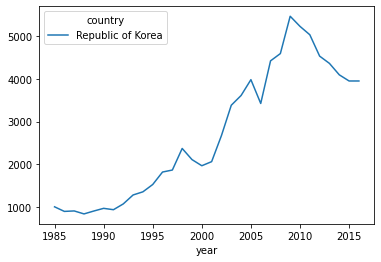

Cluster 2 number of entries 1


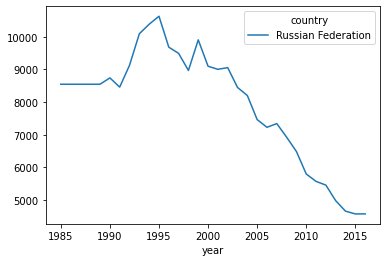

Cluster 6 number of entries 1


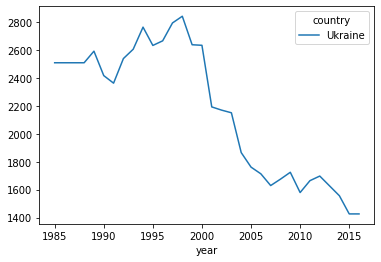

Cluster 3 number of entries 1


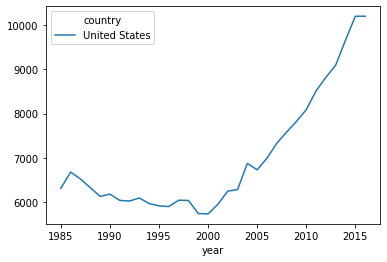

In [ ]:
print_clusters(inter_ts_fem.T, Z_f, 10, True)

### 2 B. Plot the dendrogram

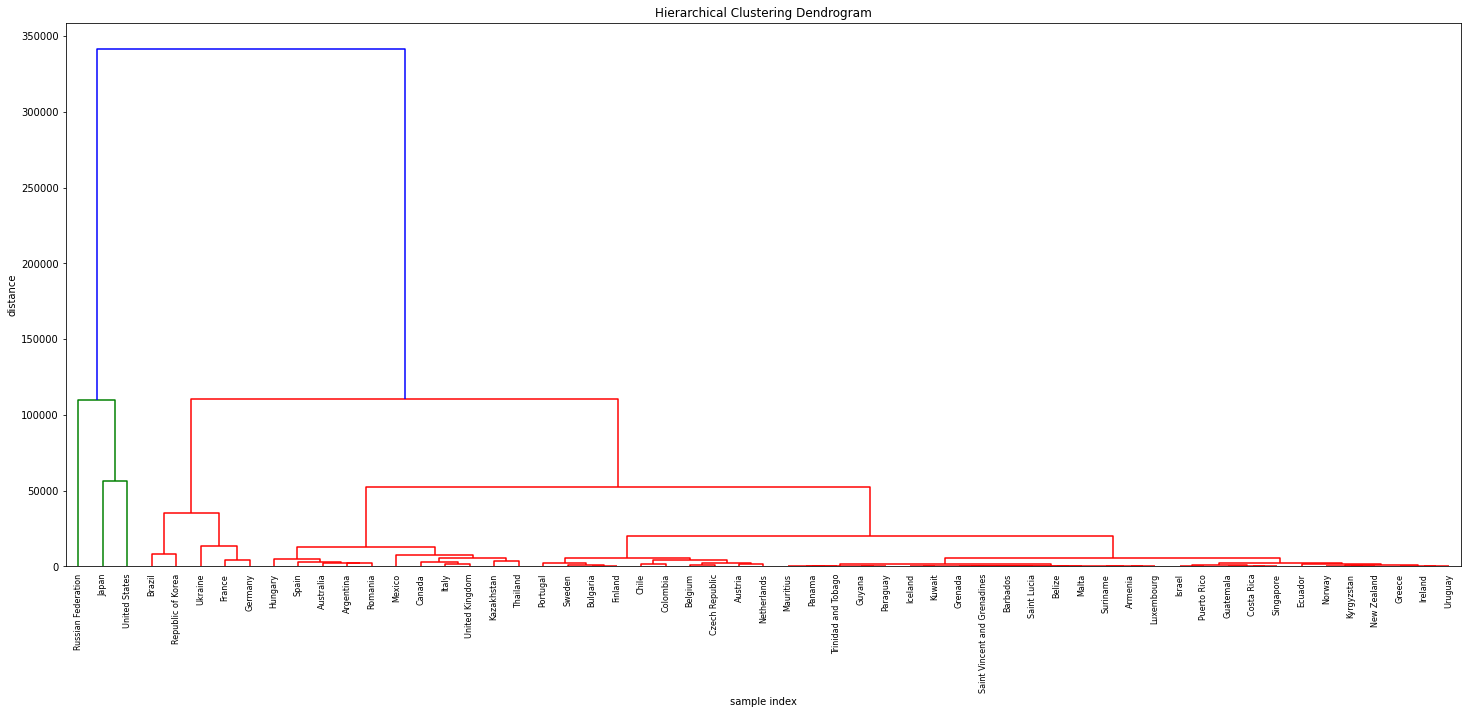

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

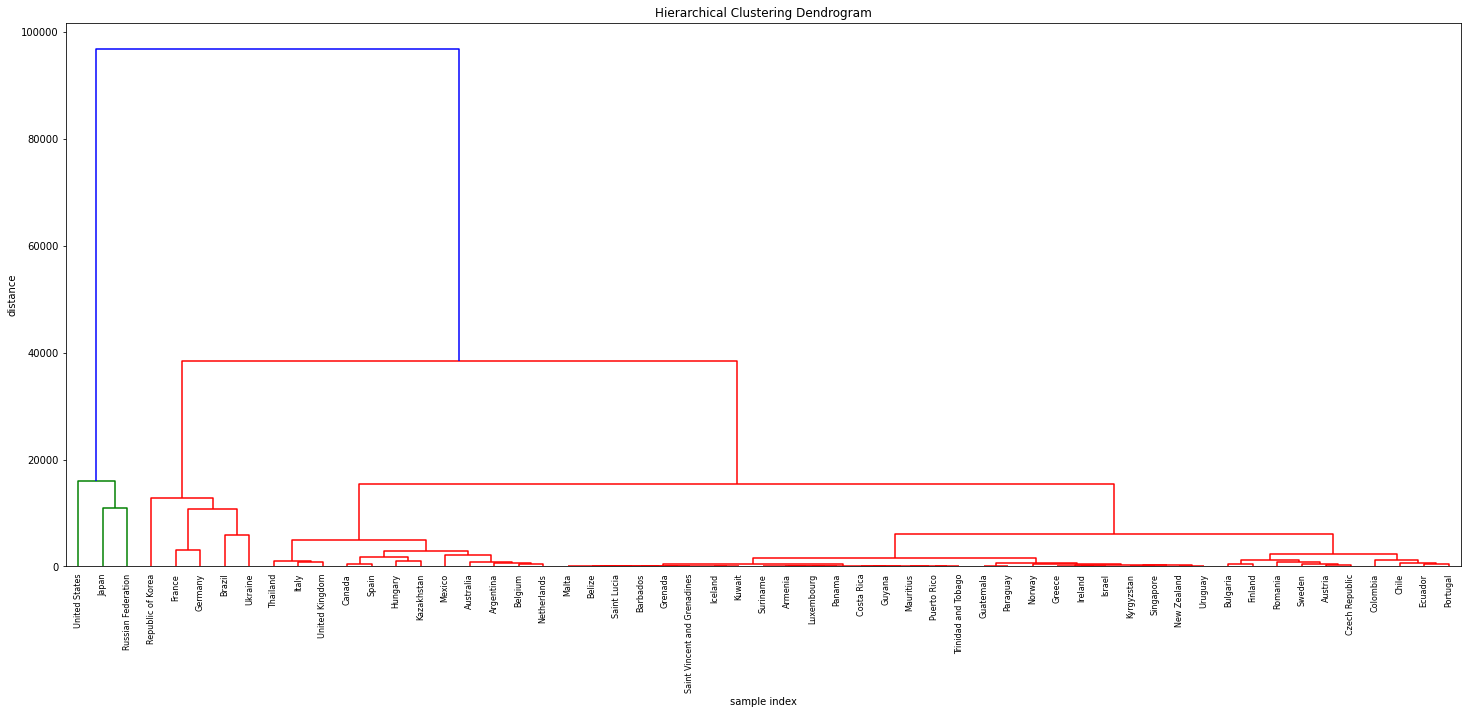

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### 2 D. Using the method Single with the metrics: Pearson Correlation, Spearman Correlation and Dynamic Time Warpping



In [ ]:
Z1 = hac.linkage(inter_ts.T, method='single', metric='correlation')
Z1_f = hac.linkage(inter_ts_fem.T, method='single', metric='correlation')


### 2 E. Plot the 3 dendrograms: single, correlation


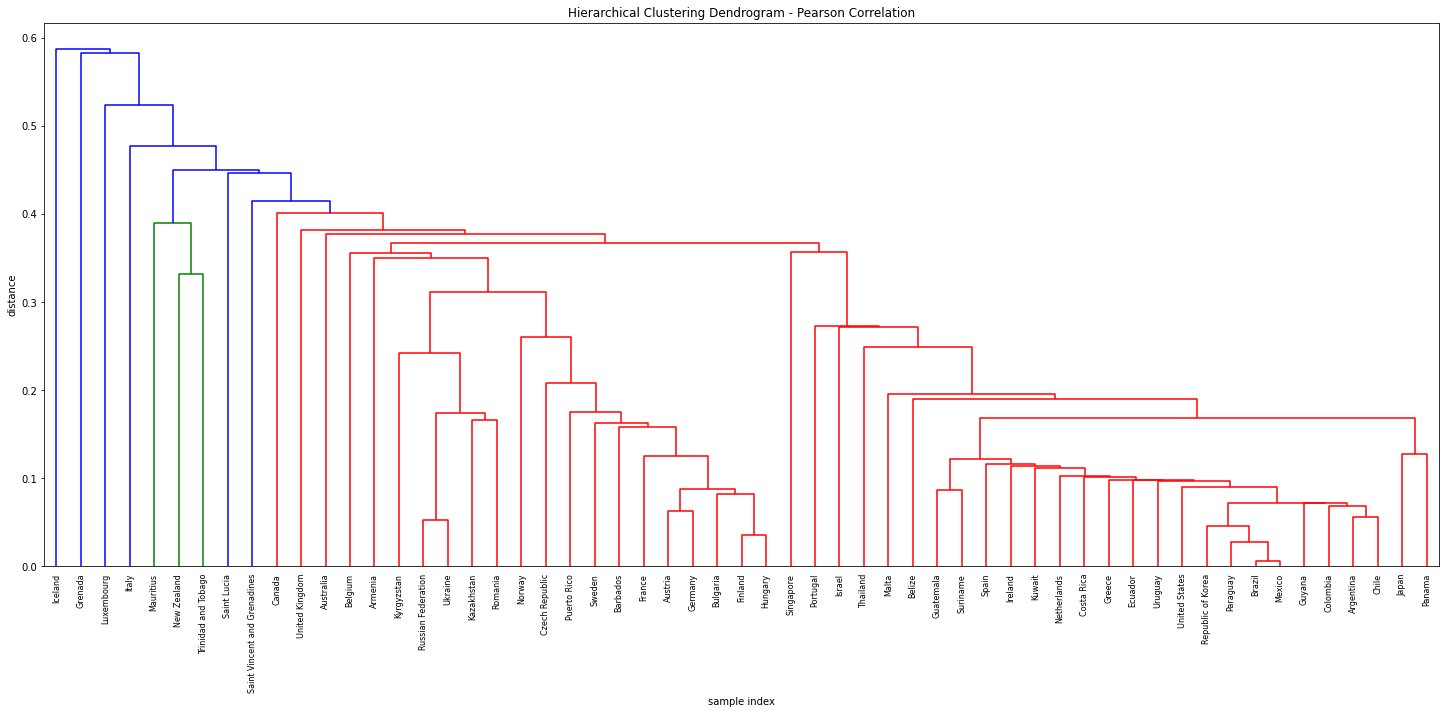

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Pearson Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z1,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

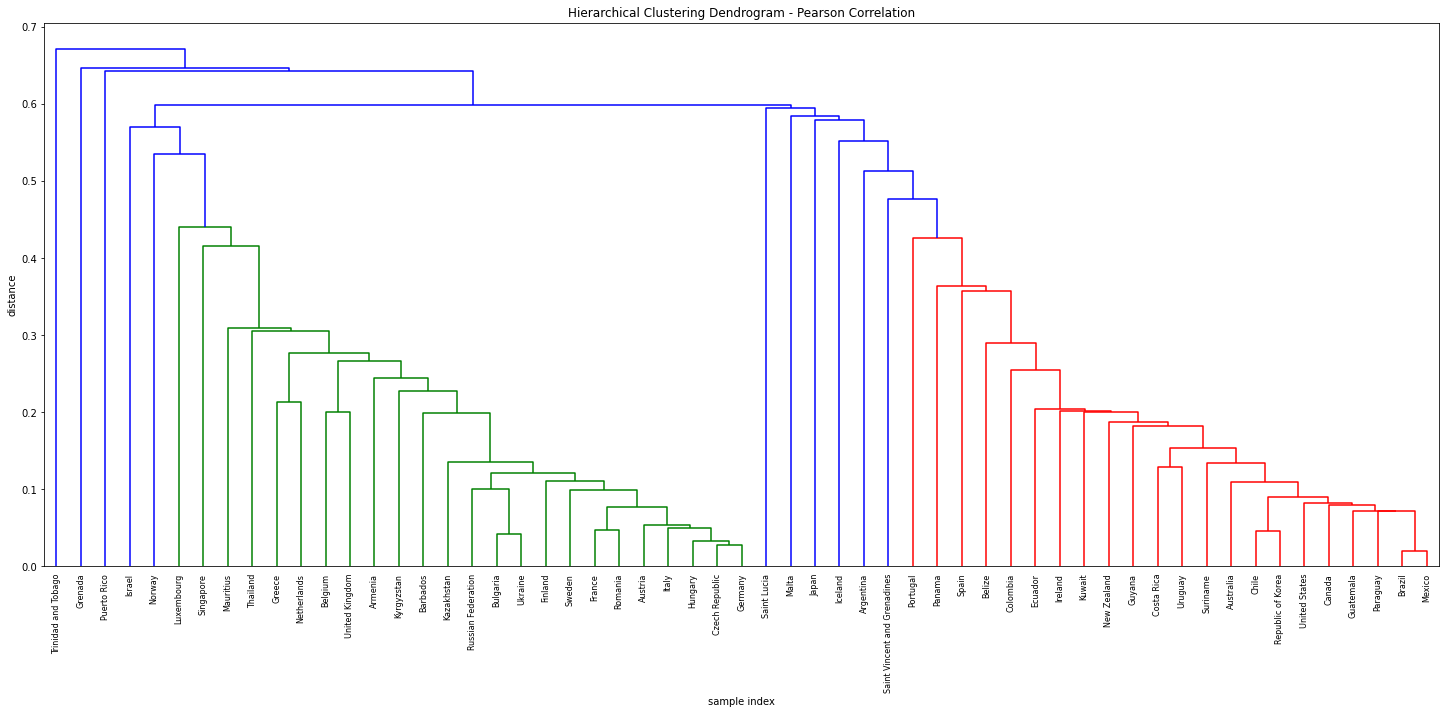

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Pearson Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z1_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# Here we use spearman correlation
def my_metric(x, y):
    r = stats.spearmanr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2
Z2 = hac.linkage(inter_ts.T, method='single', metric=my_metric)
Z2_f = hac.linkage(inter_ts_fem.T, method='single', metric=my_metric)

### 2 E. Plot the 3 dendrograms: single, Spearman



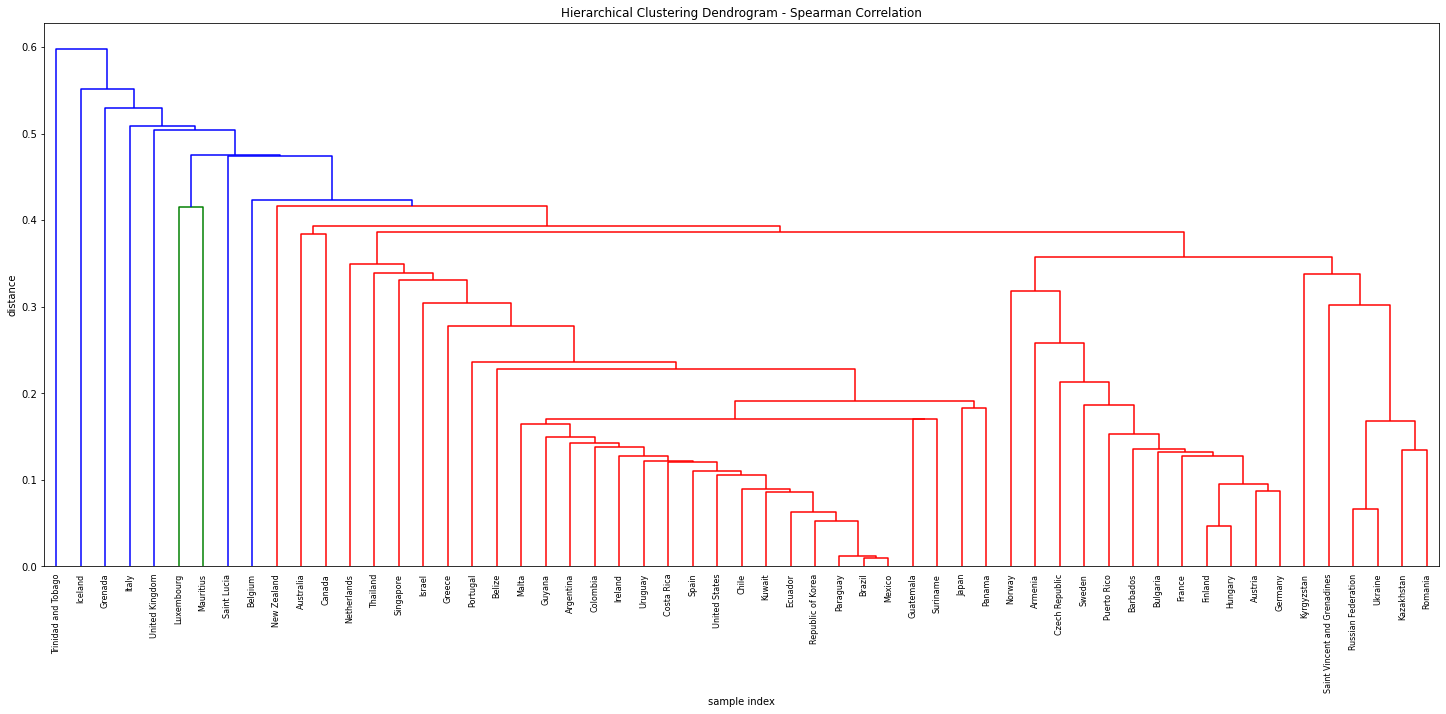

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Spearman Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z2,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

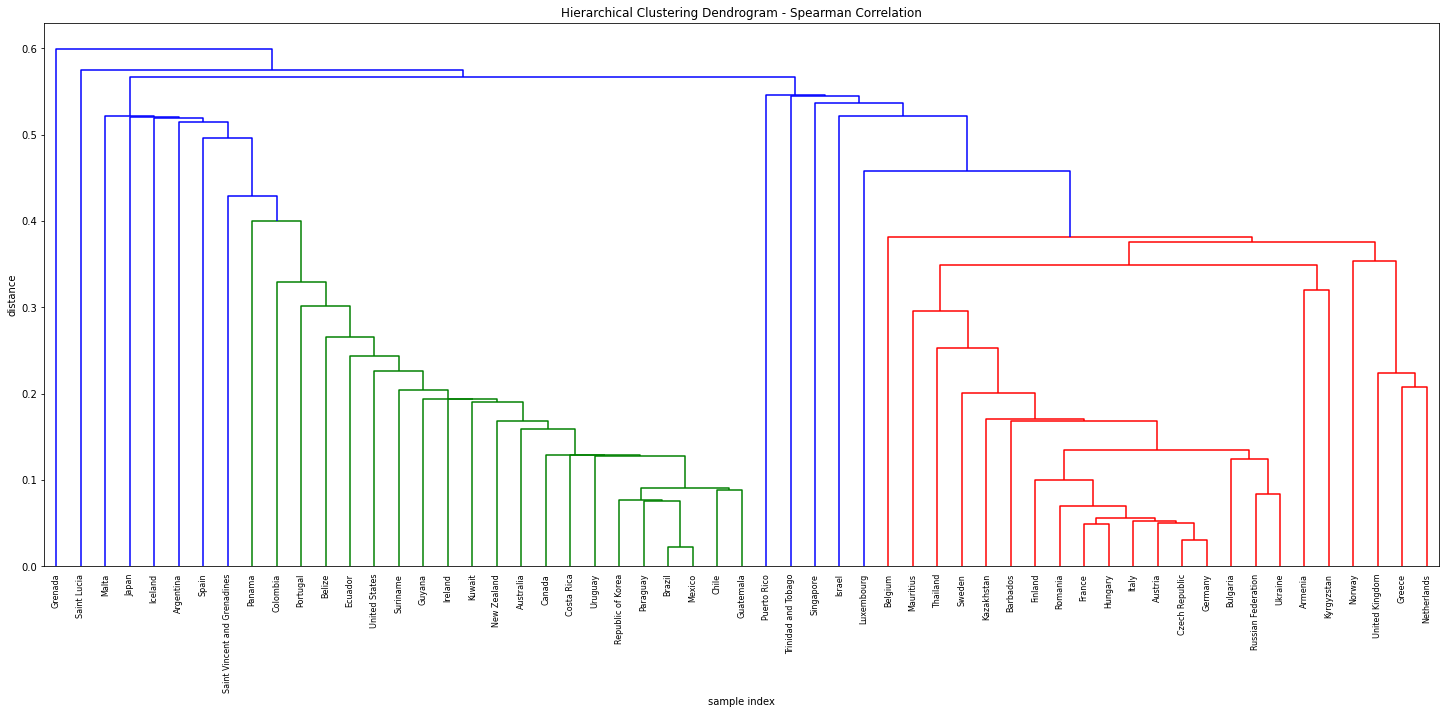

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Spearman Correlation')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z2_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance
Z3 = hac.linkage(inter_ts.T, method='single', metric=dtw)
Z3_f = hac.linkage(inter_ts_fem.T, method='single', metric=dtw)


### 2 E. Plot the 3 dendrograms: single, DTW


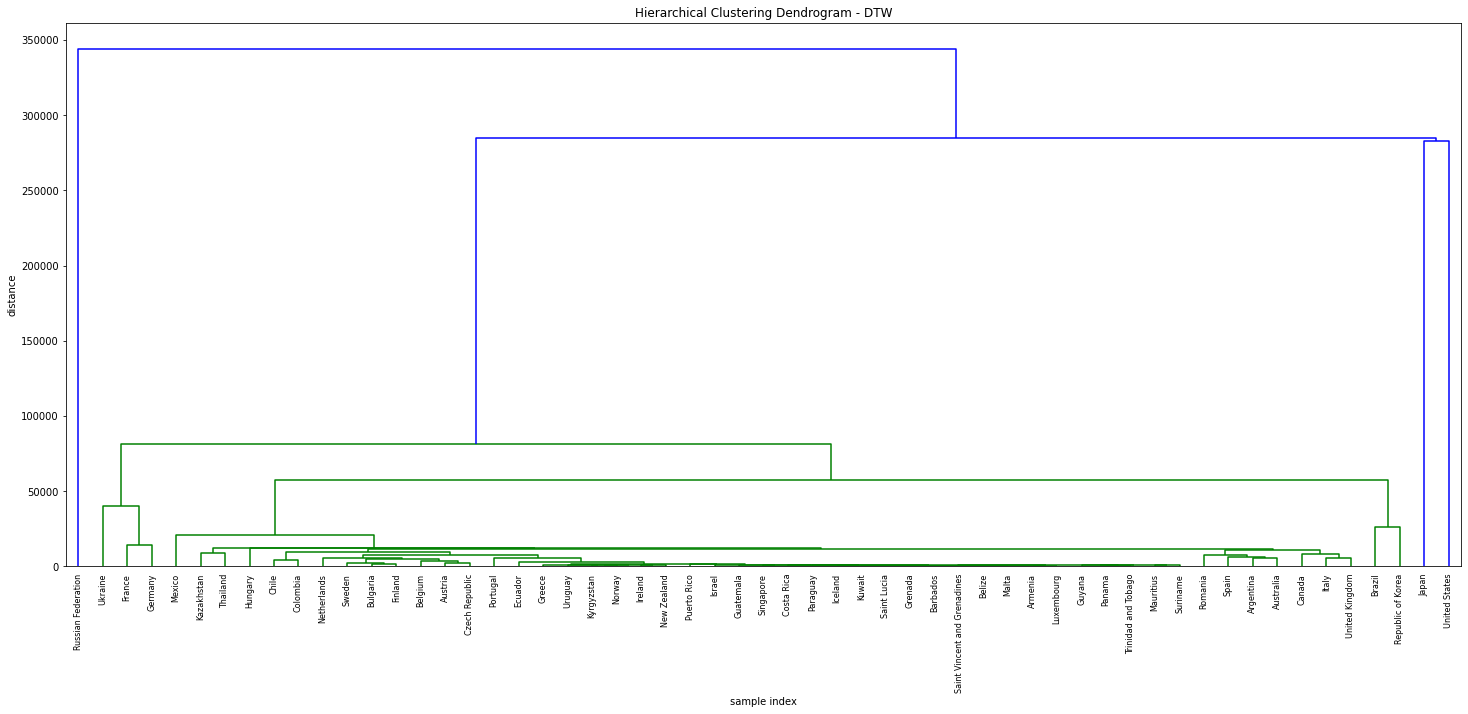

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

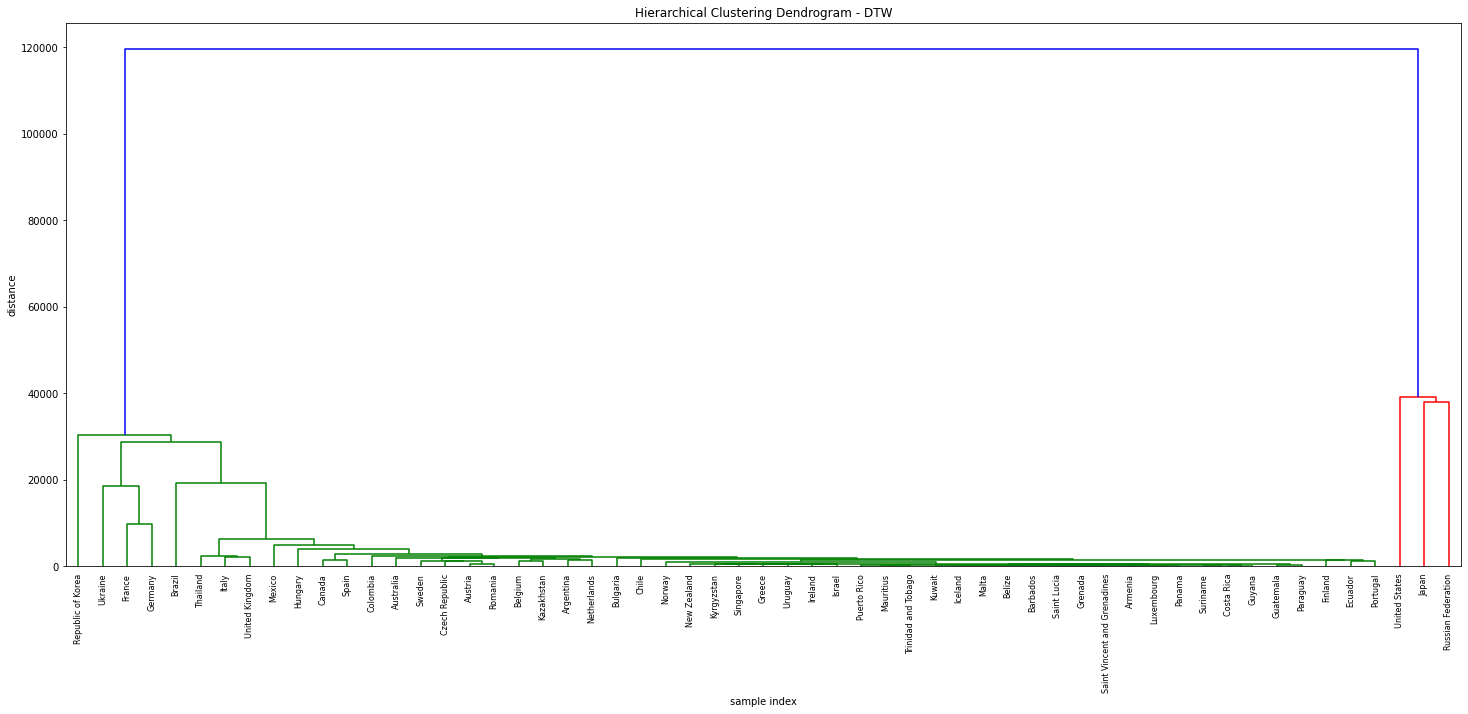

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### For the case of simple-Pearson Correlation:


[ 3  3  3  3  3  3  3  3  3  4  3  3  3  3  3  3  3  3  3  9  3  3  3 10
  3  3  7  3  3  3  3  8  3  2  3  3  1  3  3  3  3  3  3  3  3  6  5  3
  3  3  3  3  1  3  3  3  3]
Cluster 3 number of entries 47


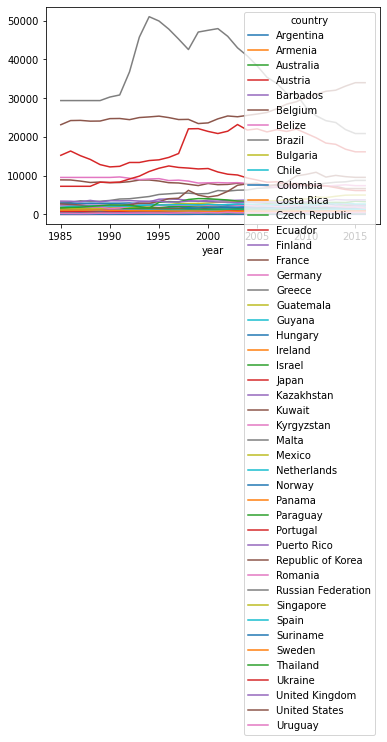

Cluster 4 number of entries 1


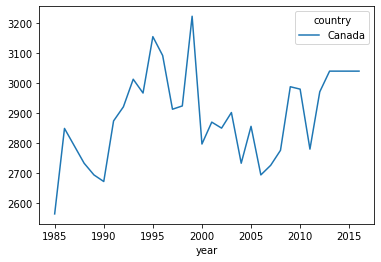

Cluster 9 number of entries 1


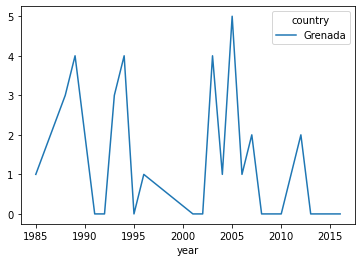

Cluster 10 number of entries 1


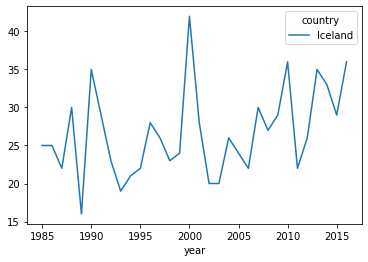

Cluster 7 number of entries 1


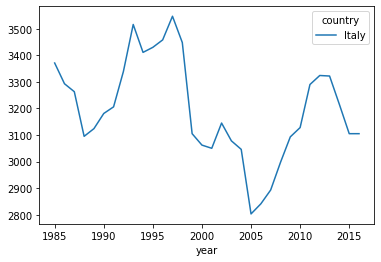

Cluster 8 number of entries 1


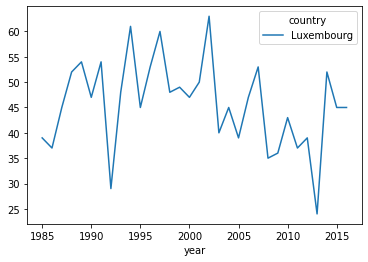

Cluster 2 number of entries 1


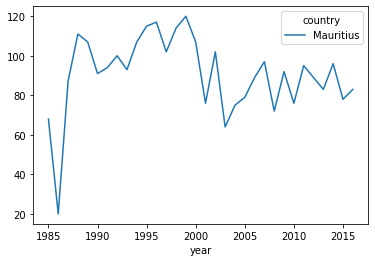

Cluster 1 number of entries 2


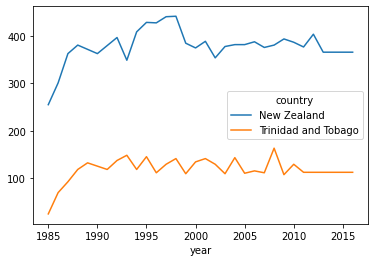

Cluster 6 number of entries 1


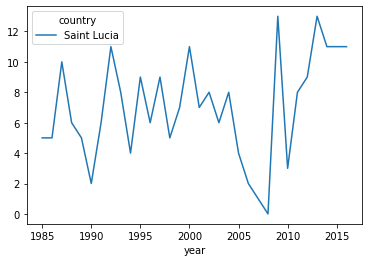

Cluster 5 number of entries 1


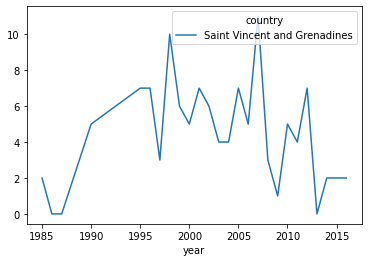

In [ ]:
print_clusters(inter_ts.T, Z1, 10, True)

[ 3  1  3  1  1  1  3  3  1  3  3  3  3  1  3  1  1  1  1  9  3  3  1  4
  3  2  1  5  1  3  1  1  6  1  3  1  3  1  3  3  3  8  3  1  1  7  3  1
  3  3  1  1 10  1  1  3  3]
Cluster 3 number of entries 24


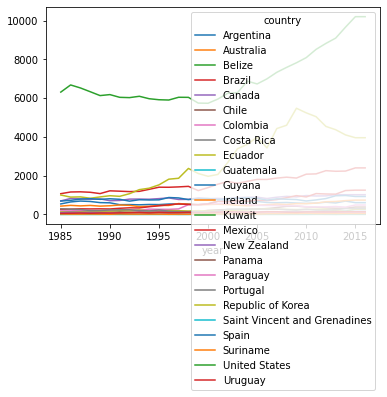

Cluster 1 number of entries 25


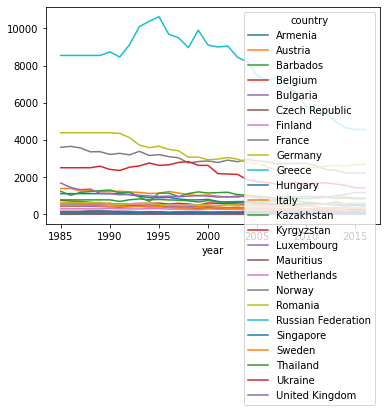

Cluster 9 number of entries 1


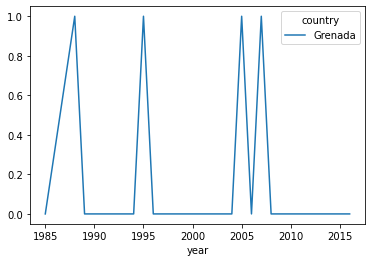

Cluster 4 number of entries 1


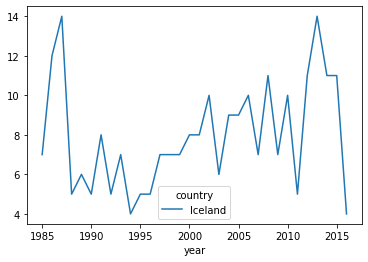

Cluster 2 number of entries 1


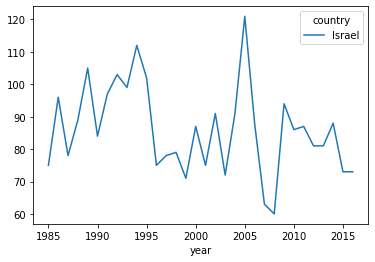

Cluster 5 number of entries 1


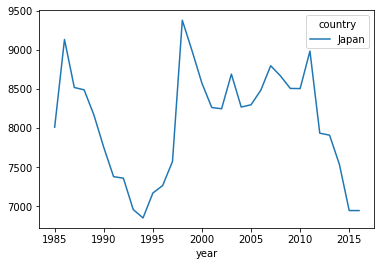

Cluster 6 number of entries 1


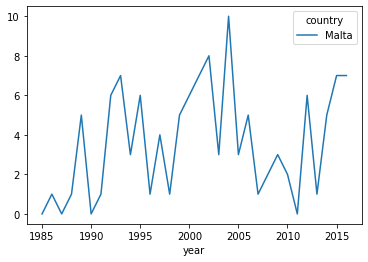

Cluster 8 number of entries 1


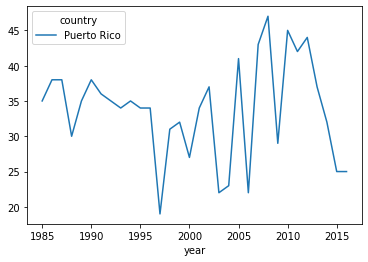

Cluster 7 number of entries 1


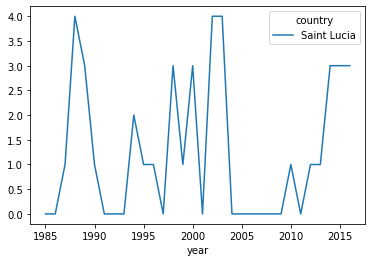

Cluster 10 number of entries 1


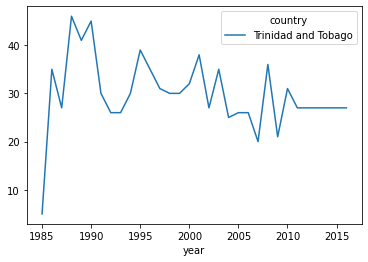

In [ ]:
print_clusters(inter_ts_fem.T, Z1_f, 10, True)

### For the case of simple-Spearman Correlation:



[ 2  2  2  2  2  4  2  2  2  2  2  2  2  2  2  2  2  2  2  8  2  2  2  9
  2  2  7  2  2  2  2  1  2  1  2  2  3  2  2  2  2  2  2  2  2  5  2  2
  2  2  2  2 10  2  6  2  2]
Cluster 2 number of entries 47


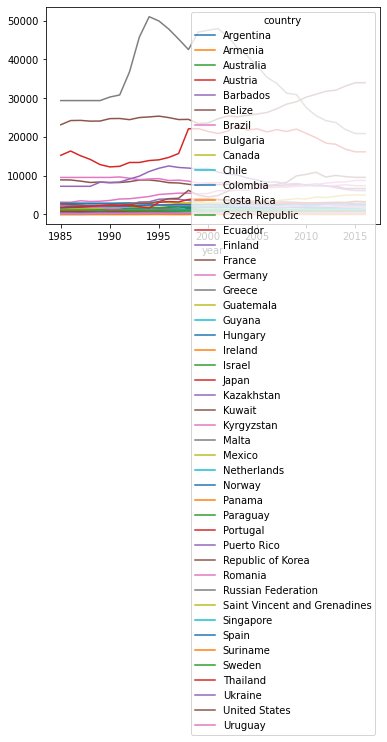

Cluster 4 number of entries 1


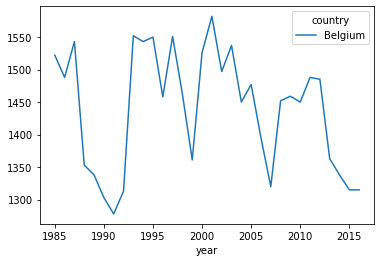

Cluster 8 number of entries 1


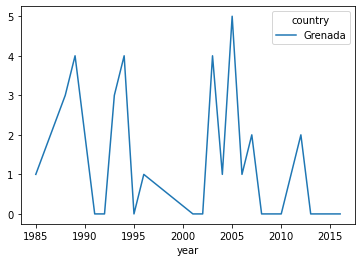

Cluster 9 number of entries 1


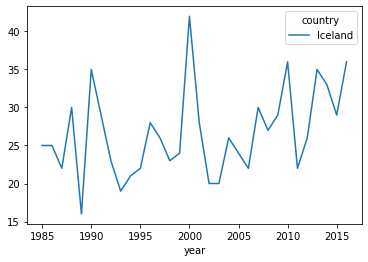

Cluster 7 number of entries 1


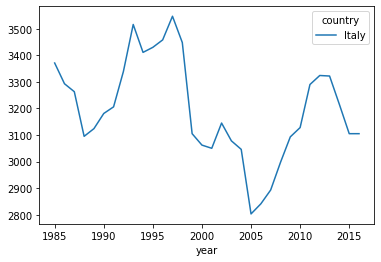

Cluster 1 number of entries 2


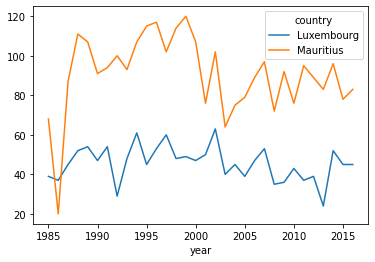

Cluster 3 number of entries 1


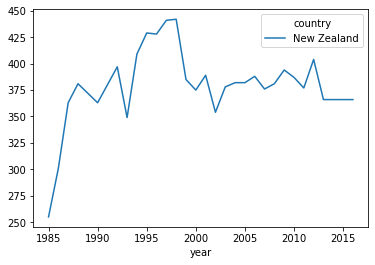

Cluster 5 number of entries 1


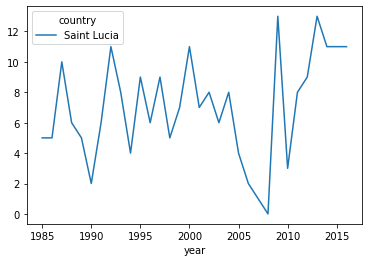

Cluster 10 number of entries 1


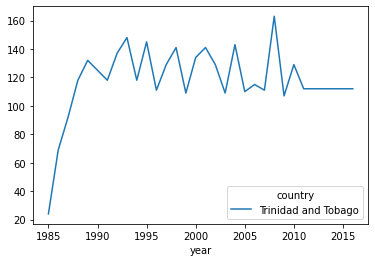

Cluster 6 number of entries 1


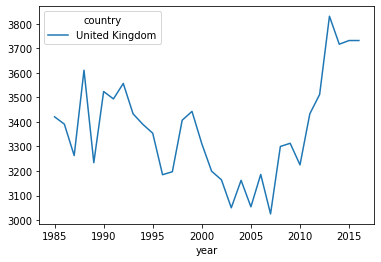

In [ ]:
print_clusters(inter_ts.T, Z2, 10, True)

[ 1  4  1  4  4  4  1  1  4  1  1  1  1  4  1  4  4  4  4 10  1  1  4  1
  1  5  4  2  4  1  4  4  3  4  1  4  1  4  1  1  1  8  1  4  4  9  1  6
  1  1  4  4  7  4  4  1  1]
Cluster 1 number of entries 25


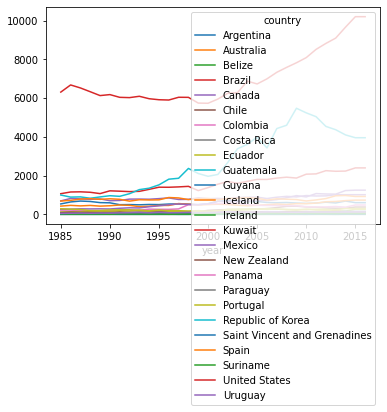

Cluster 4 number of entries 24


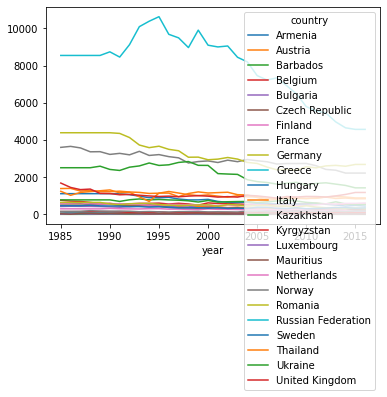

Cluster 10 number of entries 1


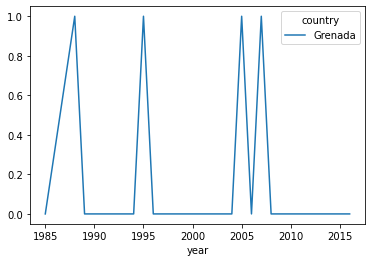

Cluster 5 number of entries 1


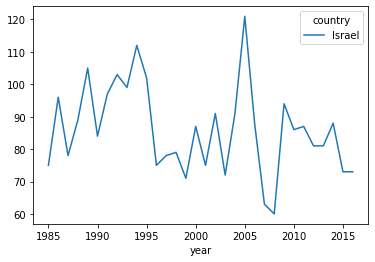

Cluster 2 number of entries 1


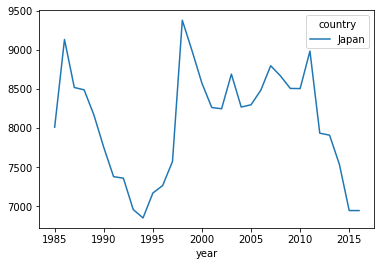

Cluster 3 number of entries 1


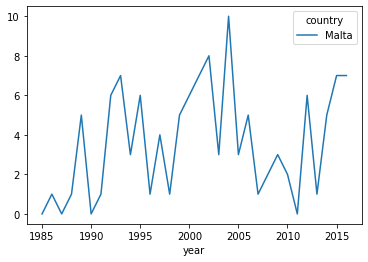

Cluster 8 number of entries 1


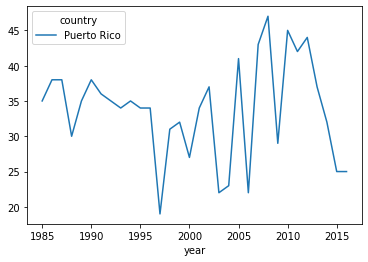

Cluster 9 number of entries 1


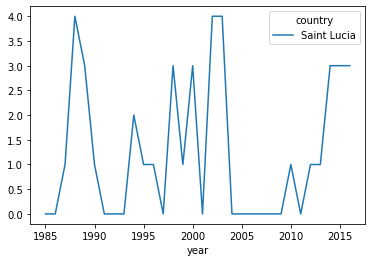

Cluster 6 number of entries 1


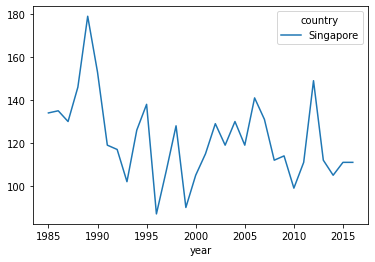

Cluster 7 number of entries 1


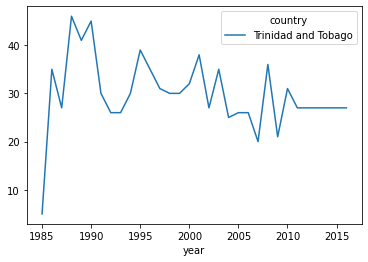

In [ ]:
print_clusters(inter_ts_fem.T, Z2_f, 10, True)

### For the case of simple-DTW:

Same thing as the other two. There is a cluster that has 28 states, which is almost all of them.
With this type of visualization, we can also see which states are the ones that behave differently.

[ 4  4  4  4  4  4  4  6  4  4  4  4  4  4  4  4  1  2  4  4  4  4  4  4
  4  4  4  8  4  4  4  4  4  4  5  4  4  4  4  4  4  4  7  4 10  4  4  4
  4  4  4  4  4  3  4  9  4]
Cluster 4 number of entries 48


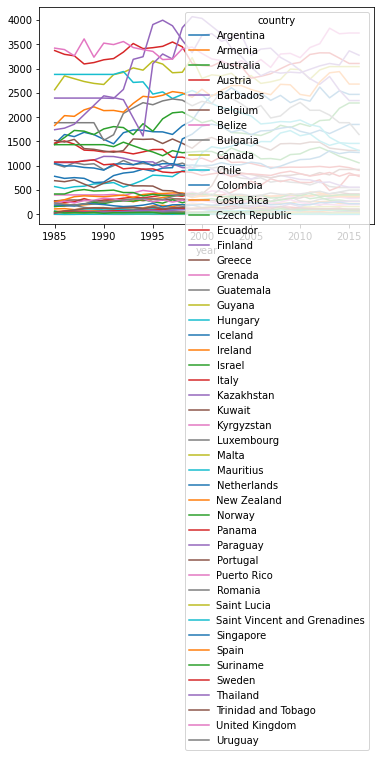

Cluster 6 number of entries 1


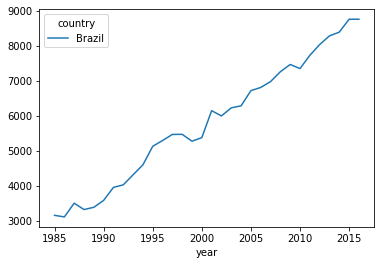

Cluster 1 number of entries 1


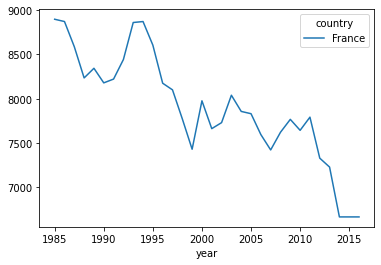

Cluster 2 number of entries 1


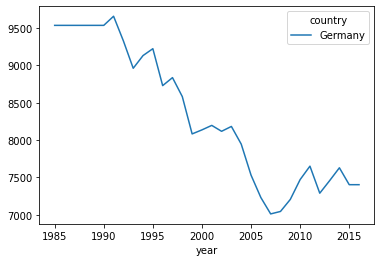

Cluster 8 number of entries 1


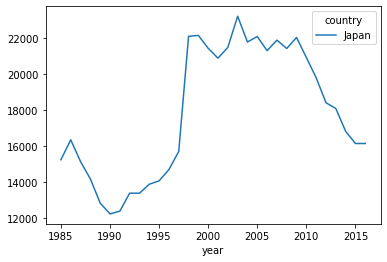

Cluster 5 number of entries 1


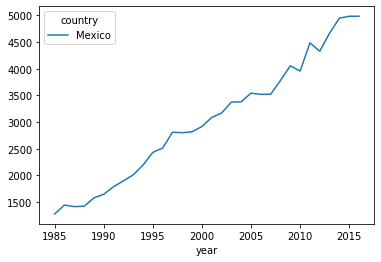

Cluster 7 number of entries 1


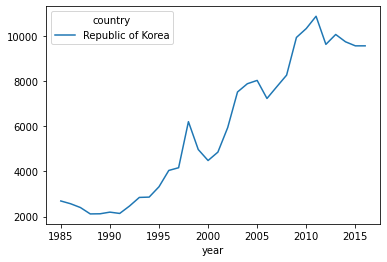

Cluster 10 number of entries 1


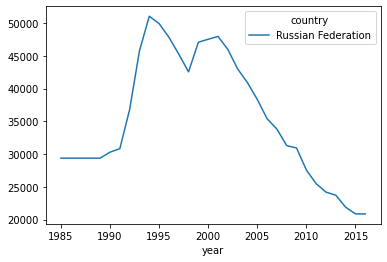

Cluster 3 number of entries 1


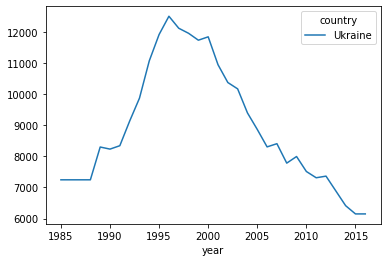

Cluster 9 number of entries 1


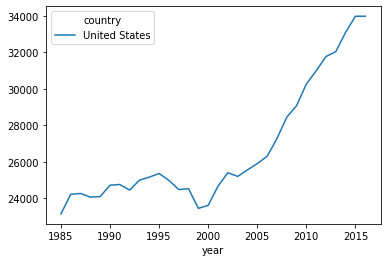

In [ ]:
print_clusters(inter_ts.T, Z3, 10, True)

[ 5  5  5  5  5  5  5  6  5  5  5  5  5  5  5  5  1  2  5  5  5  5  5  5
  5  5  4  8  5  5  5  5  5  5  5  5  5  5  5  5  5  5  7  5  9  5  5  5
  5  5  5  4  5  3  4 10  5]
Cluster 5 number of entries 46


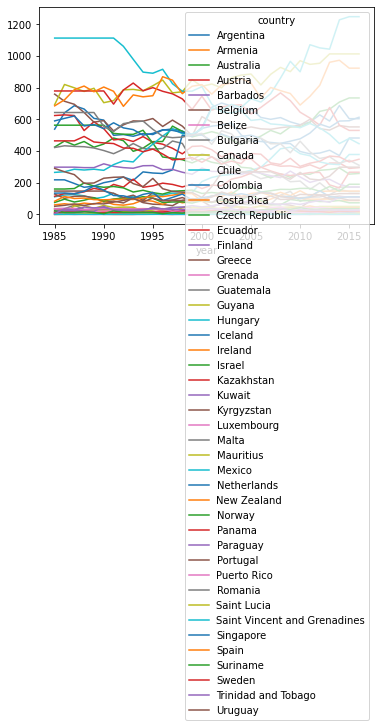

Cluster 6 number of entries 1


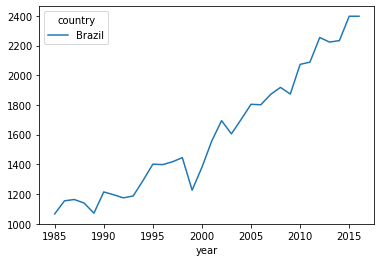

Cluster 1 number of entries 1


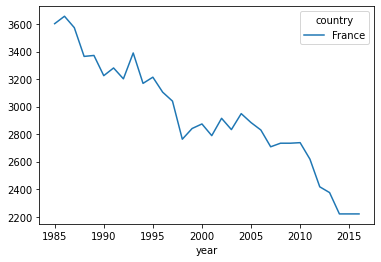

Cluster 2 number of entries 1


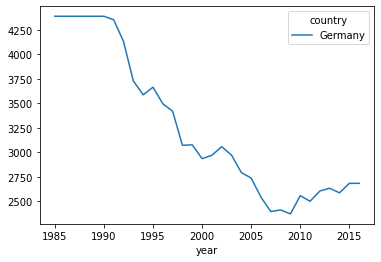

Cluster 4 number of entries 3


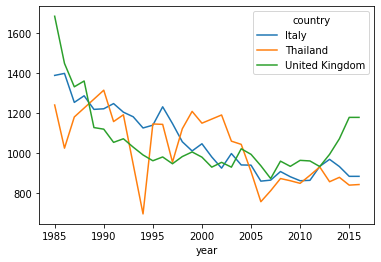

Cluster 8 number of entries 1


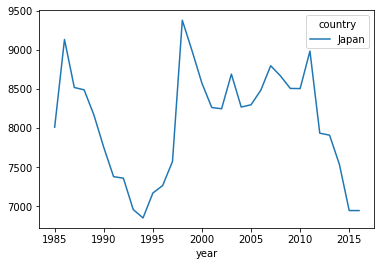

Cluster 7 number of entries 1


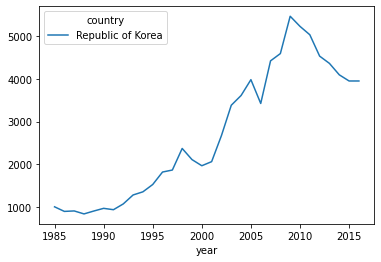

Cluster 9 number of entries 1


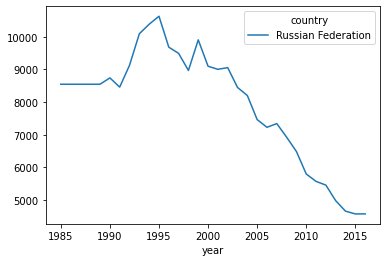

Cluster 3 number of entries 1


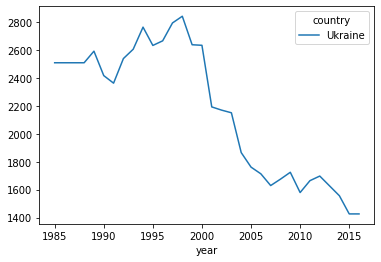

Cluster 10 number of entries 1


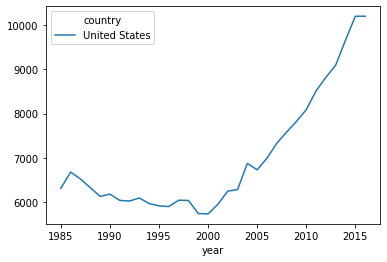

In [ ]:
print_clusters(inter_ts_fem.T, Z3_f, 10, True)